In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statistics
from scipy import stats as st
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

<a id="0"></a> <br>
# Table of contents
1. [Credit score classification](#1)     
1. [Inoformation about the dataset](#2) 
1. [Loading and reviewing data](#3)
1. [Helper functions](#4)
1. [Cleaning of the train dataset](#5) 
1. [Data transformation](#6) 
1. [Model building](#7)     
    1. [Random forest](#8)
    1. [Decision tree](#9)
    1. [Logistic regression](#10)
    1. [KNN](#11)
    1. [XG Boost](#12)
1. [Cleaning of the test dataset](#13)
1. [Models application](#14)
    1. [Random forest](#15)
    1. [Decision tree](#16)
    1. [XG Boost](#17)
1. [Conclusion](#18)
1. [References](#19)

<a id="1"></a> <br> 
# Credit score classification
The Credit Score Classification aims to develop a robust and accurate system for classifying credit scores. Credit score classification plays a vital role in assessing an individual's creditworthiness and determining their eligibility for loans, credit cards, and other financial services. It is a crucial component of risk assessment for financial institutions, helping them make informed decisions while minimizing the risk of defaults. Today banks and credit card companies use Machine Learning algorithms to classify all the customers in their database based on their credit history.

The project begins with an exploratory data analysis (EDA) phase to gain insights into the dataset. Following the EDA, the data cleaning process involved handling missing values, removing duplicates, and addressing any inconsistencies or errors in the dataset. Additionally, data transformation techniques were employed to prepare the data for modeling, including feature scaling and encoding categorical variables.

The model building and evaluation stage focused on developing a multi-class classification model capable of accurately predicting credit score categories. Different machine learning algorithms such as decision trees,random forests, xgboost, KNN and logistic regression were implemented and evaluated for their performance. Model evaluation involved assessing metrics such as precision, recall, F1-score, and accuracy to measure the model's performance and ensure its effectiveness in classifying credit scores. The project concluded with test dataset imported to gain insights how the models would perform on a data which was not seen before.

<a id="2"></a> <br> 
## Information about the dataset

* **ID**- Represents a unique identification of an entry
* **Customer_ID** - Represents a unique identification of a person
* **Month** - Represents the month of the year
* **Name** - Represents the name of a person
* **Age** - Represents the age of the person
* **SSN** - Represents the social security number of a person
* **Occupation** - Represents the occupation of the person
* **Annual_Income** - Represents the annual income of the person
* **Monthly_Inhand_Salary** - Represents the monthly base salary of a person
* **Num_Bank_Accounts** - Represents the number of bank accounts a person holds
* **Num_Credit_Card** - Represents the number of other credit cards held by a person
* **Interest_Rate** - Represents the interest rate on credit card
* **Num_of_Loan** - Represents the number of loans taken from the bank
* **Type_of_Loan** - Represents the types of loan taken by a person
* **Delay_from_due_date** - Represents the average number of days delayed from the payment date
* **Num_of_Delayed_Payment** - Represents the average number of payments delayed by a person
* **Changed_Credit_Limit** - Represents the percentage change in credit card limit
* **Num_Credit_Inquiries** - Represents the number of credit card inquiries
* **Credit_Mix** - Represents the classification of the mix of credits
* **Outstanding_Debt** - Represents the remaining debt to be paid (in USD)
* **Credit_Utilization_Ratio** - Represents the utilization ratio of credit card
* **Credit_History_Age** - Represents the age of credit history of the person
* **Payment_of_Min_Amount** - Represents whether only the minimum amount was paid by the person
* **Total_EMI_per_month** - Represents the monthly EMI payments (in USD)
* **Amount_invested_monthly** - Represents the monthly amount invested by the customer (in USD)
* **Payment_Behaviour** - Represents the payment behavior of the customer (in USD)
* **Monthly_Balance** - Represents the monthly balance amount of the customer (in USD)

<a id="3"></a> <br> 
## Loading and reviewing the data

In [3]:
credit_score_data_train = pd.read_csv("data/train.csv", low_memory=False)

In [4]:
credit_score_data_test = pd.read_csv("data/test.csv")

Now let's see what is the shape of the two datasets.

In [5]:
# Checking the size of the train dataset
credit_score_data_train.shape

(100000, 28)

In [6]:
# Checking the size of test dataset
credit_score_data_test.shape

(50000, 27)

In [7]:
credit_score_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:
credit_score_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In our test dataset we are missing the column for the score which would be applied later. Also, we could observe that there are missing values in our dataset which shall be handled during the work.

In [9]:
# Checking the statistical information for the numerical fields in the dataset
credit_score_data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [10]:
# Checking the statistical information for the non-numerical fields in the dataset
credit_score_data_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


Considering the information above we could say that:
1. We have 12 500 customers present in our dataset
2. There might be a wrong populated data for SSN because we have 12 500 unique customer ids while the SSN unique values are 12 501
3. There are 1788 unique age values which seems strange.
4. We have 3 types of credit scores.
5. We are having information for 8 different months presented in our dataset.
6. We also have some leading or trailing '_' which shall be removed.

In [11]:
# Checking for dublicated records
credit_score_data_train.duplicated().any()

False

We do not have any dublicated records in our dataset.

<a id="4"></a> <br> 
## Helper functions

I would use some functions for getting detailed information about the data and visualizations which would be used.

In [182]:
def get_column_details(df,column):
    print("Details of",column,"column")
    
    #DataType of column
    print("\nDataType: ",df[column].dtype)
    
    #Description of the data
    print("\nDescription of the data:", df[column].describe())
    
    #Check if null values are present
    count_null = df[column].isnull().sum()
    if count_null==0:
        print("\nThere are no null values")
    elif count_null>0:
        print("\nThere are ",count_null," null values")
        
    #Get Number of Unique Values
    print("\nNumber of Unique Values: ",df[column].nunique())
    
    #Get Distribution of Column    
    print("\nDistribution of column:\n")
    print(df[column].value_counts())
    
def plot_displot(df,column,user_friendly_column_name,rotation=0,bins=20):
    palette = "deep" 
    sns.set_palette(palette)
    
    sns.displot(data=df, x=column, kde=True, bins=bins)

    plt.xlabel(f'{user_friendly_column_name}')
    plt.ylabel('Number of Records')
    plt.title(f'{user_friendly_column_name} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

def plot_stacked_bar(df,column1,column2,rotation=0):
    palette = "deep" 
    sns.set_palette(palette)

    pd.crosstab(df[column1], df[column2]).plot(kind='bar', stacked=True)
    
    plt.xlabel(f'{column1}')
    plt.ylabel('Number of Records')
    plt.title(f'{column1} & {column2} Distribution')
    plt.xticks(rotation=30)

    plt.show()

def plot_countplot(df,column,rotation=0):
    plt.figure(figsize=(12,6))

    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}', fontweight='bold')
    plt.xlabel(column, fontsize=13)
    plt.xticks(rotation=30)
    plt.show()

<a id="5"></a> <br> 
## Cleaning of the train dataset

I would change type of some the variables to category.

For categorical values I will replace null and wrong information with mode per customer.

For numerical values I will replace null and wrong information with forward/backward, mean or mode.

In [13]:
category_columns = ['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']
credit_score_data_train[category_columns] = credit_score_data_train[category_columns].astype('category')

Now I would clean the categorical variables.

In [14]:
get_column_details(credit_score_data_train, "Occupation")

Details of Occupation column

DataType:  category

Description of the data: count      100000
unique         16
top       _______
freq         7062
Name: Occupation, dtype: object

There are no null values

Number of Unique Values:  16

Distribution of column:

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64


Considering the information above we could say that:
1. There are 16 unique Occupation values
2. 7062 of the records of Occupation are '______' which I would replace with NaN

In [15]:
credit_score_data_train['Occupation'] = credit_score_data_train['Occupation'].apply(lambda x: np.NaN if x == '_______' else x)
credit_score_data_train['Occupation'] = credit_score_data_train.groupby('Customer_ID')['Occupation'].apply(lambda x: x.fillna(x.mode()[0]))
credit_score_data_train['Occupation'] = credit_score_data_train['Occupation'].astype('category')

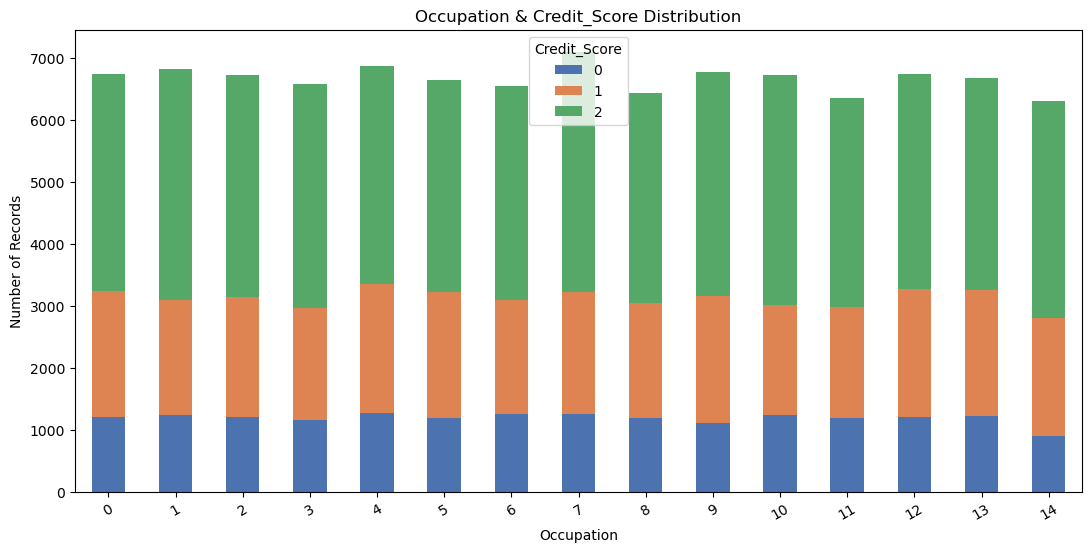

In [183]:
plot_stacked_bar(credit_score_data_train, "Occupation", "Credit_Score")

We could see that the distribution of Credit_Scrore across different occupation is similar.

In [17]:
get_column_details(credit_score_data_train, "Month")

Details of Month column

DataType:  object

Description of the data: count      100000
unique          8
top       January
freq        12500
Name: Month, dtype: object

There are no null values

Number of Unique Values:  8

Distribution of column:

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64


In the training dataset, we have credit score for each customer over the course of 8 months(from January to August).
I would convert Month column from object to datetime value so that it can be further use for model building.

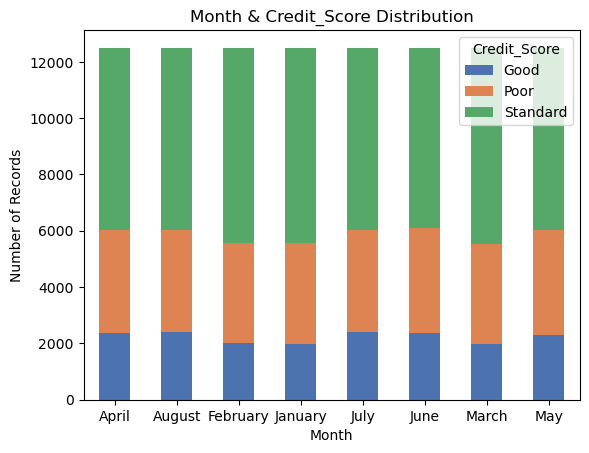

In [18]:
plot_stacked_bar(credit_score_data_train, "Month", 'Credit_Score')

Distribution of Credit_Scrore across different months is similar.

In [19]:
credit_score_data_train['Month'] = pd.to_datetime(credit_score_data_train.Month, format='%B').dt.month

In [20]:
get_column_details(credit_score_data_train, "Payment_Behaviour")

Details of Payment_Behaviour column

DataType:  category

Description of the data: count                             100000
unique                                 7
top       Low_spent_Small_value_payments
freq                               25513
Name: Payment_Behaviour, dtype: object

There are no null values

Number of Unique Values:  7

Distribution of column:

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64


For 7.6k records, Payment Behaviour  is filled with '!@9#%8' which I would replace with NaN.

In [21]:
credit_score_data_train['Payment_Behaviour'] = credit_score_data_train['Payment_Behaviour'].apply(lambda x: np.NaN if x == "!@9#%8" else x)
credit_score_data_train['Payment_Behaviour'] = credit_score_data_train.groupby('Customer_ID')['Payment_Behaviour'].apply(lambda x: x.fillna(x.mode()[0]))
credit_score_data_train['Payment_Behaviour'] = credit_score_data_train['Payment_Behaviour'].astype('category')

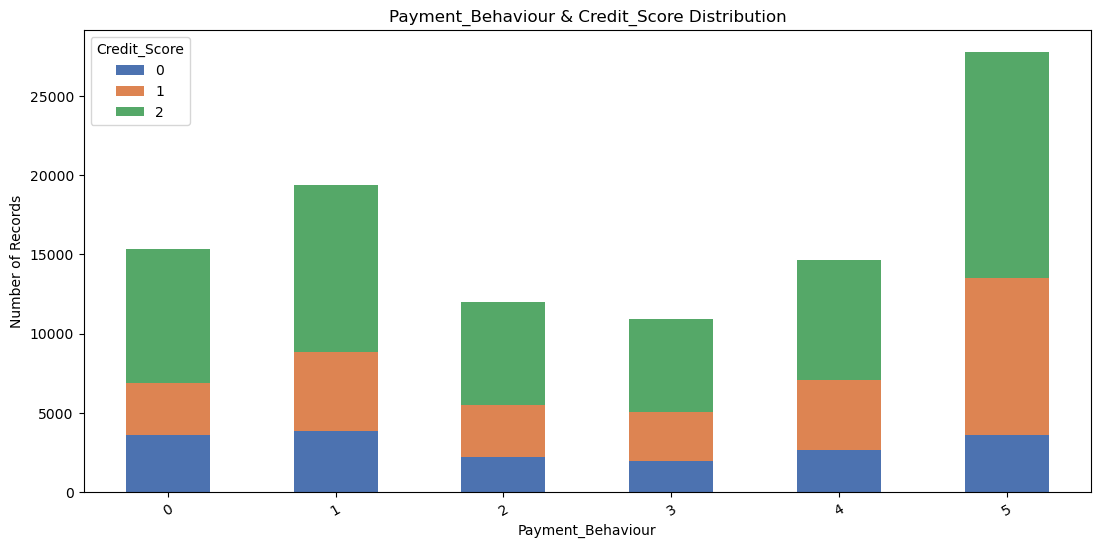

In [184]:
plot_stacked_bar(credit_score_data_train, 'Payment_Behaviour', 'Credit_Score')

In [23]:
get_column_details(credit_score_data_train, "Credit_Mix")

Details of Credit_Mix column

DataType:  category

Description of the data: count       100000
unique           4
top       Standard
freq         36479
Name: Credit_Mix, dtype: object

There are no null values

Number of Unique Values:  4

Distribution of column:

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64


1. There are 3 types of Credit Mix: Standard, Good, Bad. 
2. About 20k records are missing and I would replace them with NaN

In [24]:
credit_score_data_train['Credit_Mix'] = credit_score_data_train['Credit_Mix'].apply(lambda x: np.NaN if x == "_" else x)
credit_score_data_train['Credit_Mix'] = credit_score_data_train.groupby('Customer_ID')['Credit_Mix'].apply(lambda x: x.fillna(x.mode()[0]))
credit_score_data_train['Credit_Mix'] = credit_score_data_train['Credit_Mix'].astype('category')

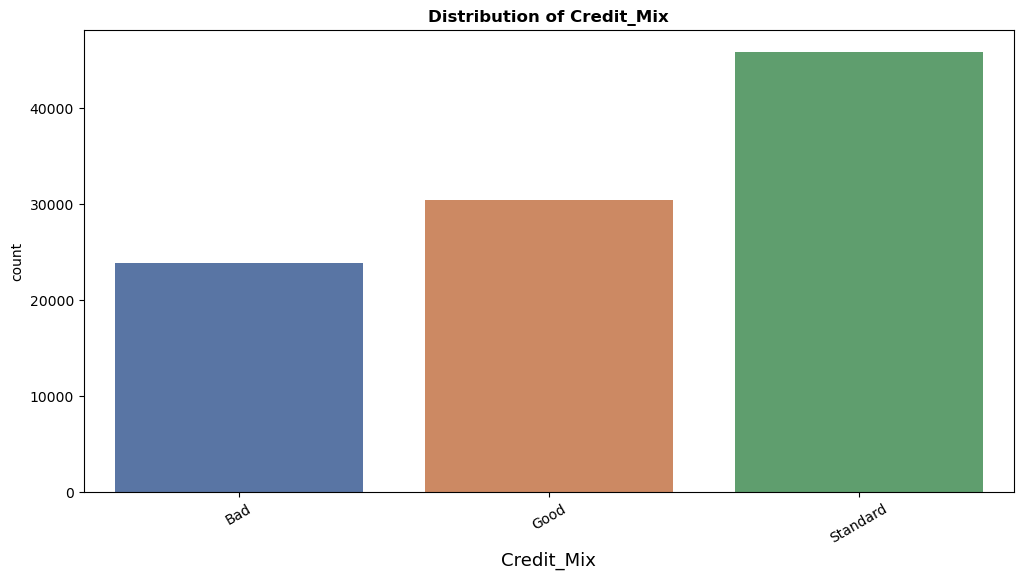

In [25]:
plot_countplot(credit_score_data_train, "Credit_Mix")

In [26]:
get_column_details(credit_score_data_train, 'Payment_of_Min_Amount')

Details of Payment_of_Min_Amount column

DataType:  category

Description of the data: count     100000
unique         3
top          Yes
freq       52326
Name: Payment_of_Min_Amount, dtype: object

There are no null values

Number of Unique Values:  3

Distribution of column:

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64


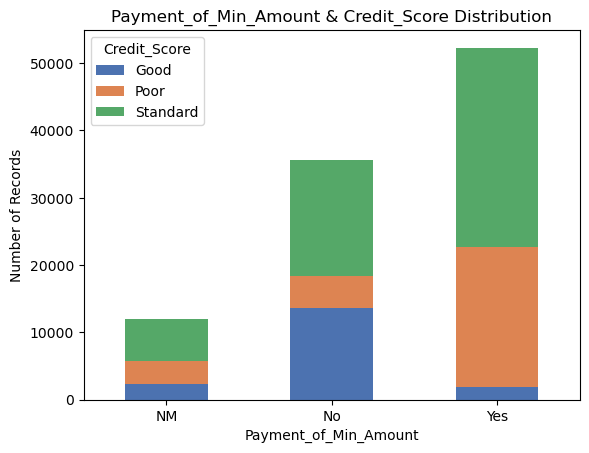

In [27]:
plot_stacked_bar(credit_score_data_train, 'Payment_of_Min_Amount', 'Credit_Score')

In [28]:
get_column_details(credit_score_data_train, 'Credit_Score')

Details of Credit_Score column

DataType:  category

Description of the data: count       100000
unique           3
top       Standard
freq         53174
Name: Credit_Score, dtype: object

There are no null values

Number of Unique Values:  3

Distribution of column:

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64


There are 3 different Credit Score - Standard, Good & Poor.

Distribution of credit score -

a) Standard - 53%

b) Poor - 29%

c) Good - 18%

There are no null values for Credit Score.

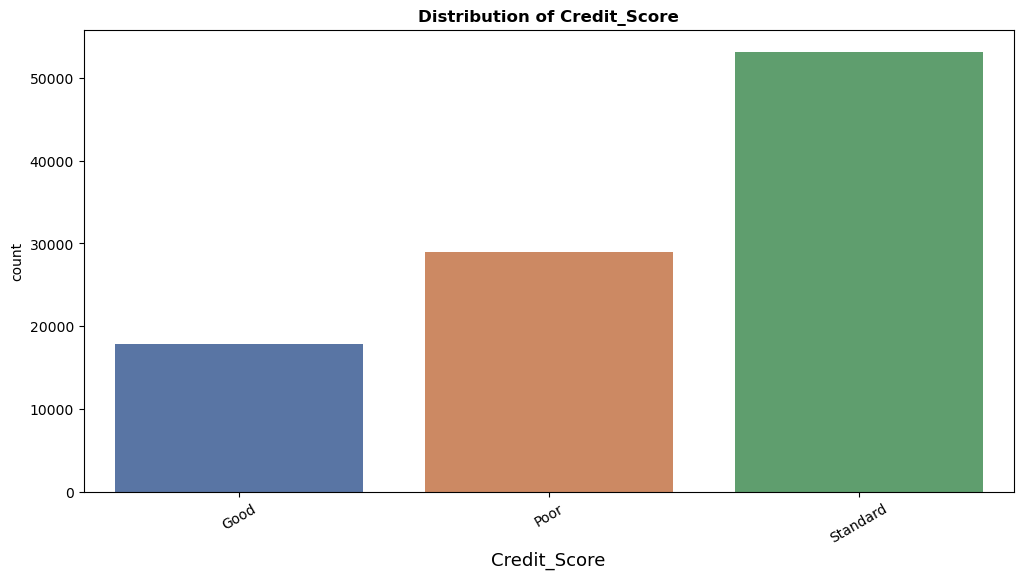

In [29]:
plot_countplot(credit_score_data_train, 'Credit_Score')

We could see that most of the  people have a standard credit score

Handle numeric variables.

In [30]:
cols=['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly']
for col in cols:
    credit_score_data_train[col] = credit_score_data_train[col].apply(lambda x: x if x is np.nan or not isinstance(x, str)
        else x.replace("_","")).replace("",np.nan)
    credit_score_data_train[col] = credit_score_data_train[col].astype('float')

In [31]:
get_column_details(credit_score_data_train, "Age")

Details of Age column

DataType:  float64

Description of the data: count    100000.000000
mean        110.649700
std         686.244717
min        -500.000000
25%          24.000000
50%          33.000000
75%          42.000000
max        8698.000000
Name: Age, dtype: float64

There are no null values

Number of Unique Values:  1728

Distribution of column:

38.0      2994
28.0      2968
31.0      2955
26.0      2945
32.0      2884
          ... 
1908.0       1
4583.0       1
7549.0       1
3119.0       1
1342.0       1
Name: Age, Length: 1728, dtype: int64


Age column: 
1. There are 1728 unique values of Age and it is stored as an object. Having 1728 distinct values of Age mean that there is a lot of dirty data.

In [32]:
# Creating a function for cleaning the age column
def clean_age(x):
    if x > 100 or x <=0:
        return np.NaN
    return x

In [33]:
credit_score_data_train['Age'] = credit_score_data_train['Age'].apply(lambda x: x if x is np.nan or not isinstance(x, str)
                    else x.replace("_","")).replace("",np.nan)
credit_score_data_train['Age'] = credit_score_data_train['Age'].astype('int')

In [34]:
credit_score_data_train['Age'] = credit_score_data_train['Age'].apply(clean_age)
credit_score_data_train['Age'] = credit_score_data_train.groupby('Customer_ID')['Age'].transform(lambda x: x.mode()[0])

In [35]:
get_column_details(credit_score_data_train, "Age")

Details of Age column

DataType:  float64

Description of the data: count    100000.000000
mean         33.274560
std          10.764438
min          14.000000
25%          24.000000
50%          33.000000
75%          42.000000
max          56.000000
Name: Age, dtype: float64

There are no null values

Number of Unique Values:  43

Distribution of column:

31.0    3112
28.0    3096
26.0    3032
38.0    3032
25.0    3016
36.0    2952
27.0    2952
35.0    2944
39.0    2936
34.0    2896
44.0    2888
37.0    2888
32.0    2888
22.0    2880
19.0    2840
41.0    2840
20.0    2816
29.0    2808
21.0    2776
23.0    2776
43.0    2768
30.0    2768
40.0    2712
24.0    2696
42.0    2688
45.0    2648
33.0    2632
18.0    2568
46.0    1704
15.0    1616
17.0    1568
16.0    1456
48.0    1432
53.0    1424
55.0    1424
49.0    1376
51.0    1368
52.0    1360
54.0    1320
50.0    1312
14.0    1256
47.0    1224
56.0     312
Name: Age, dtype: int64


After cleaning up Age value, 43 distinct Age remains.

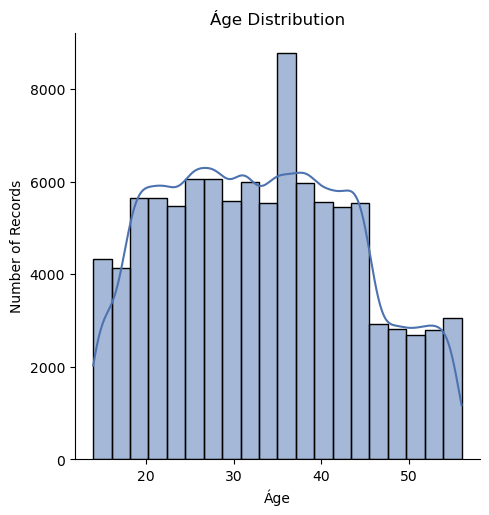

In [36]:
plot_displot(credit_score_data_train,"Age","Áge",rotation=0,bins=20)

Distribution of age seems to be uniform.

In [37]:
get_column_details(credit_score_data_train, "Annual_Income")

Details of Annual_Income column

DataType:  float64

Description of the data: count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

There are no null values

Number of Unique Values:  13487

Distribution of column:

17816.75       16
22434.16       16
40341.16       16
17273.83       16
109945.32      16
               ..
17079092.00     1
1910572.00      1
20179076.00     1
7980216.00      1
8299495.00      1
Name: Annual_Income, Length: 13487, dtype: int64


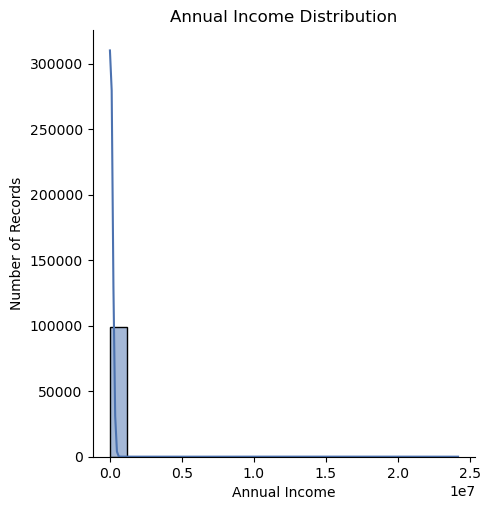

In [38]:
plot_displot(credit_score_data_train, "Annual_Income", "Annual Income")

Most customers have a low Annual income. Distribution is right skewed.

In [39]:
get_column_details(credit_score_data_train, "Monthly_Inhand_Salary")

Details of Monthly_Inhand_Salary column

DataType:  float64

Description of the data: count    84998.000000
mean      4194.170850
std       3183.686167
min        303.645417
25%       1625.568229
50%       3093.745000
75%       5957.448333
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

There are  15002  null values

Number of Unique Values:  13235

Distribution of column:

6769.130000    15
6358.956667    15
2295.058333    15
6082.187500    15
3080.555000    14
               ..
1087.546445     1
3189.212103     1
5640.117744     1
7727.560450     1
2443.654131     1
Name: Monthly_Inhand_Salary, Length: 13235, dtype: int64


In [40]:
credit_score_data_train['Monthly_Inhand_Salary'] = credit_score_data_train.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda v: v.mean())
credit_score_data_train['Monthly_Inhand_Salary'] = credit_score_data_train['Monthly_Inhand_Salary'].astype('float')

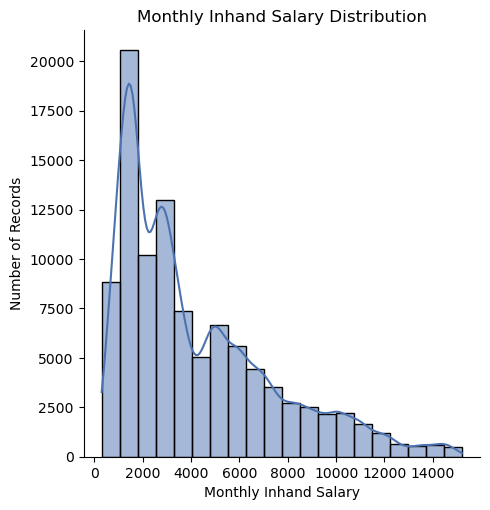

In [41]:
plot_displot(credit_score_data_train, 'Monthly_Inhand_Salary', 'Monthly Inhand Salary')

We could see that most customers have a low monthly income. Distribution is right skewed.

In [42]:
get_column_details(credit_score_data_train, 'Num_Bank_Accounts')

Details of Num_Bank_Accounts column

DataType:  int64

Description of the data: count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

There are no null values

Number of Unique Values:  943

Distribution of column:

6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
1626        1
1470        1
887         1
211         1
697         1
Name: Num_Bank_Accounts, Length: 943, dtype: int64


We can see that Num_Bank_Accounts are in range of -1 to 1798. Account number could not be negative and also greatert than 11 is clearly wrong entry. I would replace the num of accounts greater than 11 with the mode.

In [43]:
credit_score_data_train['Num_Bank_Accounts'].replace(-1, 0, inplace=True)

In [44]:
credit_score_data_train['Num_Bank_Accounts'] = credit_score_data_train['Num_Bank_Accounts'].apply(lambda x: np.NaN if x>10 else x)
credit_score_data_train['Num_Bank_Accounts'] = credit_score_data_train.groupby('Customer_ID')['Num_Bank_Accounts'].transform(lambda v: v.mode()[0])

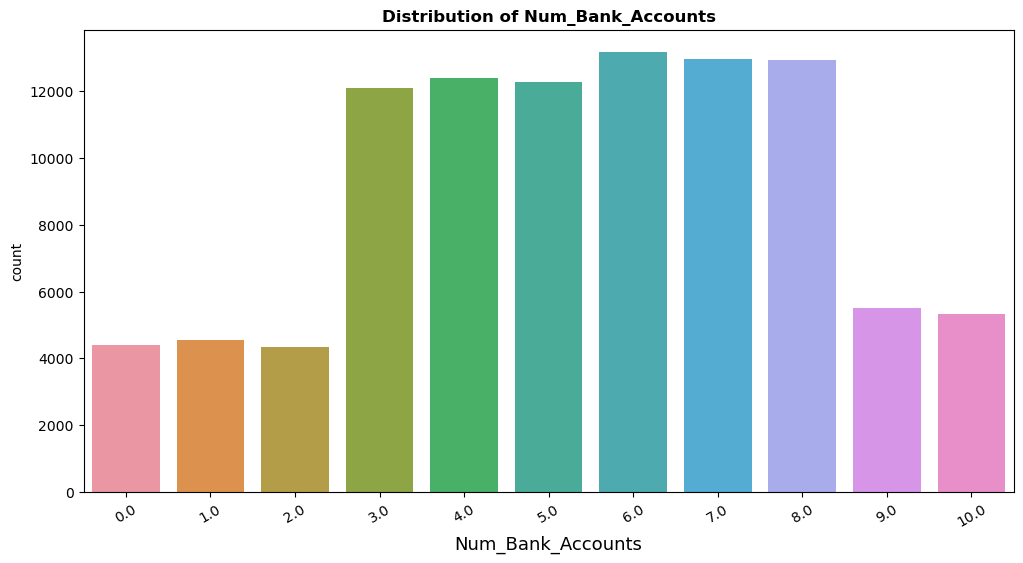

In [45]:
plot_countplot(credit_score_data_train,'Num_Bank_Accounts')

Majority of customers has number of bank accounts between 3 to 8.

In [46]:
get_column_details(credit_score_data_train, "Num_Credit_Card")

Details of Num_Credit_Card column

DataType:  int64

Description of the data: count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

There are no null values

Number of Unique Values:  1179

Distribution of column:

5       18459
7       16615
6       16559
4       14030
3       13277
        ...  
791         1
1118        1
657         1
640         1
679         1
Name: Num_Credit_Card, Length: 1179, dtype: int64


We can see that Num_Credit_Card are in range of 0 to 1499. Account number greatert than 11 is clearly wrong entry. Replace those entries with mode as per each customer

In [47]:
credit_score_data_train['Num_Credit_Card'] = credit_score_data_train['Num_Credit_Card'].apply(lambda x: np.NaN if x>10 else x)
credit_score_data_train['Num_Credit_Card'] = credit_score_data_train.groupby('Customer_ID')['Num_Credit_Card'].transform(lambda v: v.mode()[0])

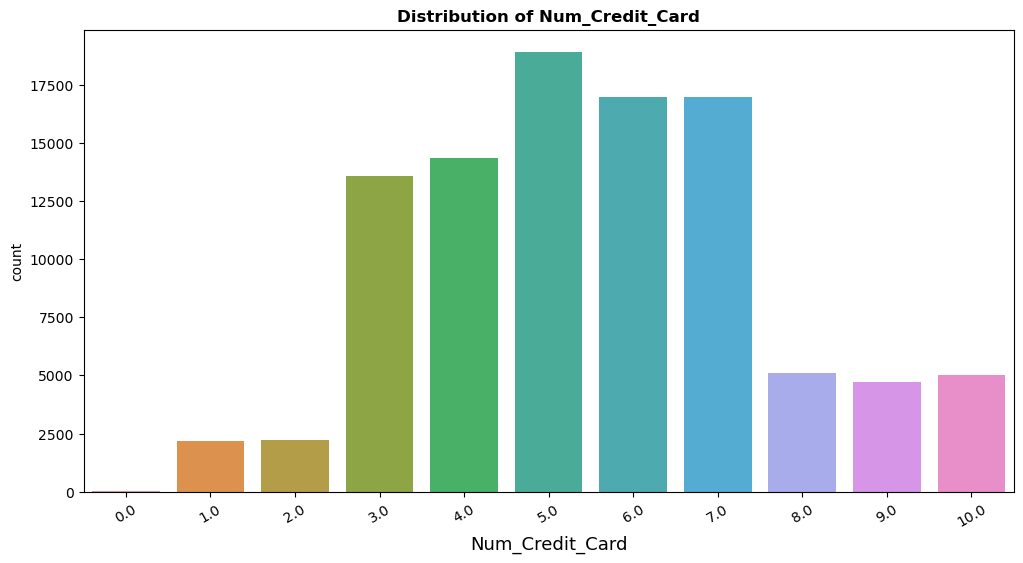

In [48]:
plot_countplot(credit_score_data_train, 'Num_Credit_Card')

Most of the customers having credit cards in the range of 3 to 7 with peak at 5.

In [49]:
get_column_details(credit_score_data_train, "Interest_Rate")

Details of Interest_Rate column

DataType:  int64

Description of the data: count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

There are no null values

Number of Unique Values:  1750

Distribution of column:

8       5012
5       4979
6       4721
12      4540
10      4540
        ... 
4995       1
1899       1
2120       1
5762       1
5729       1
Name: Interest_Rate, Length: 1750, dtype: int64


We could see that there are outliers present in our dataset as normal interest rate is in between 1-34%. 

In [50]:
credit_score_data_train['Interest_Rate'] = credit_score_data_train['Interest_Rate'].apply(lambda x: np.NaN if x>34 else x)
credit_score_data_train['Interest_Rate'] = credit_score_data_train.groupby('Customer_ID')['Interest_Rate'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

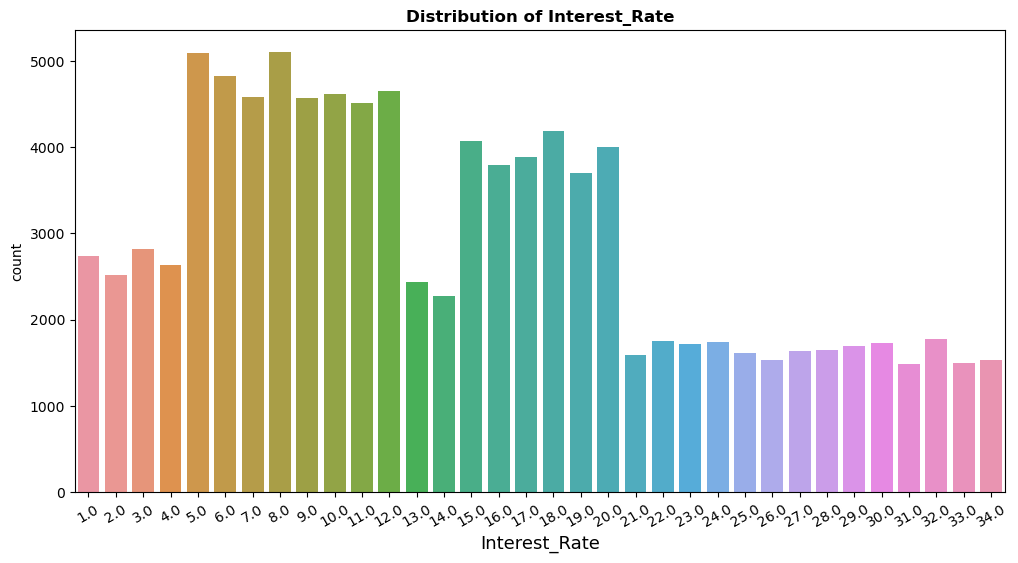

In [51]:
plot_countplot(credit_score_data_train, 'Interest_Rate')

In [52]:
get_column_details(credit_score_data_train, 'Delay_from_due_date')

Details of Delay_from_due_date column

DataType:  int64

Description of the data: count    100000.000000
mean         21.068780
std          14.860104
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64

There are no null values

Number of Unique Values:  73

Distribution of column:

 15    3596
 13    3424
 8     3324
 14    3313
 10    3281
       ... 
-4       62
 65      56
-5       33
 66      32
 67      22
Name: Delay_from_due_date, Length: 73, dtype: int64


In [53]:
credit_score_data_train['Delay_from_due_date'] = credit_score_data_train['Delay_from_due_date'].apply(lambda x: np.NaN if x<0 else x)
credit_score_data_train['Delay_from_due_date'] = credit_score_data_train.groupby('Customer_ID')['Delay_from_due_date'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

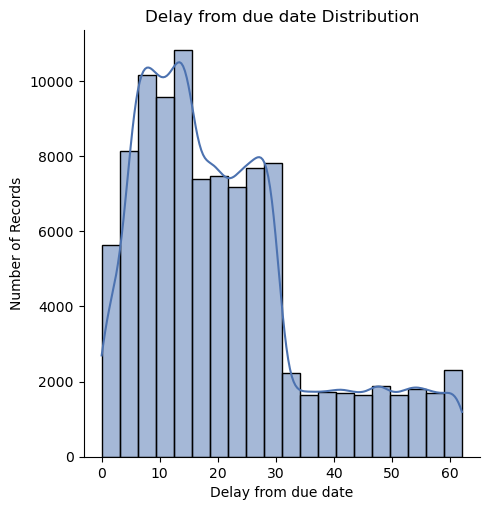

In [54]:
plot_displot(credit_score_data_train, 'Delay_from_due_date', 'Delay from due date')

Delay from due date is concentrated between 0 to 30 days.

In [55]:
get_column_details(credit_score_data_train, 'Num_of_Delayed_Payment')

Details of Num_of_Delayed_Payment column

DataType:  float64

Description of the data: count    92998.000000
mean        30.923342
std        226.031892
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

There are  7002  null values

Number of Unique Values:  711

Distribution of column:

19.0      5481
17.0      5412
16.0      5312
10.0      5309
15.0      5237
          ... 
1534.0       1
3739.0       1
3313.0       1
4191.0       1
2047.0       1
Name: Num_of_Delayed_Payment, Length: 711, dtype: int64


We could see that we have outliers which shall be cleaned. Num_of_Delayed_Payment shall be in the range from 0 to 30.

In [56]:
credit_score_data_train['Num_of_Delayed_Payment'] = credit_score_data_train['Num_of_Delayed_Payment'].apply(lambda x: np.NaN if (x>30 or x<0) else x)
credit_score_data_train['Num_of_Delayed_Payment'] = credit_score_data_train.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda v: v.mode()[0])

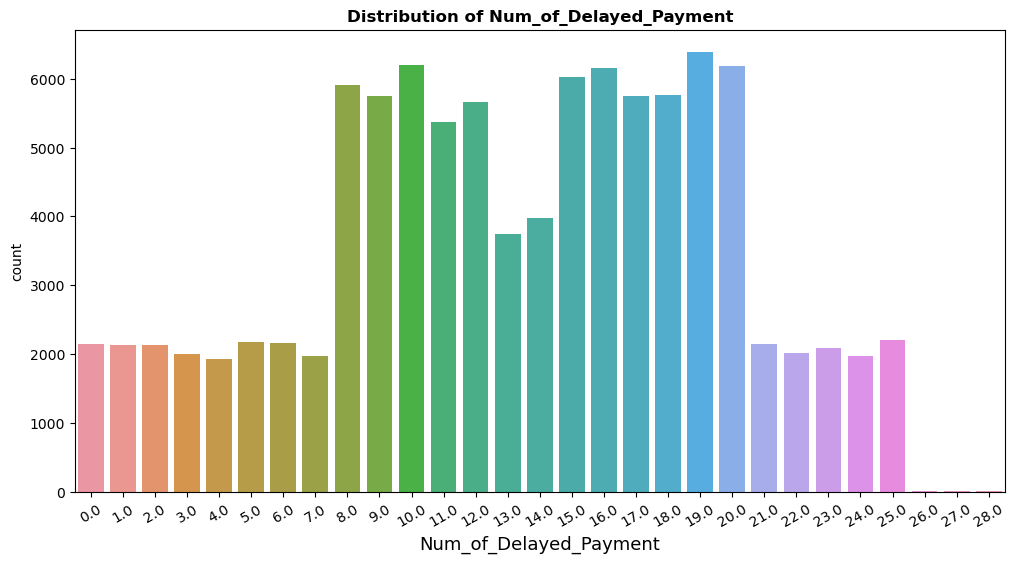

In [57]:
plot_countplot(credit_score_data_train, 'Num_of_Delayed_Payment')

Num of Delayed Payment is concentrated between 8 to 20 days.

In [58]:
get_column_details(credit_score_data_train, 'Changed_Credit_Limit')

Details of Changed_Credit_Limit column

DataType:  float64

Description of the data: count    97909.000000
mean        10.389025
std          6.789496
min         -6.490000
25%          5.320000
50%          9.400000
75%         14.870000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64

There are  2091  null values

Number of Unique Values:  4383

Distribution of column:

 8.22     133
 11.50    127
 11.32    126
 10.06    121
 7.35     121
         ... 
-1.84       1
 0.89       1
 28.06      1
 1.56       1
 21.17      1
Name: Changed_Credit_Limit, Length: 4383, dtype: int64


In [59]:
credit_score_data_train['Changed_Credit_Limit'] =credit_score_data_train.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda v: v.mode()[0])

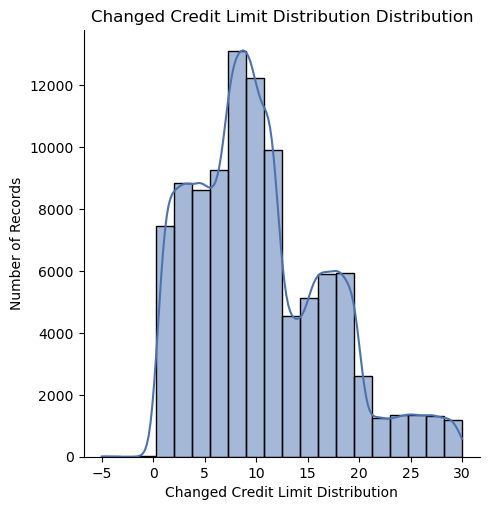

In [60]:
plot_displot(credit_score_data_train, 'Changed_Credit_Limit', 'Changed Credit Limit Distribution')

Changed credit limit seems to be multimodal with uniform distributions around the modal points.

In [61]:
get_column_details(credit_score_data_train, 'Num_Credit_Inquiries')

Details of Num_Credit_Inquiries column

DataType:  float64

Description of the data: count    98035.000000
mean        27.754251
std        193.177339
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64

There are  1965  null values

Number of Unique Values:  1223

Distribution of column:

4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
1721.0        1
1750.0        1
2397.0        1
621.0         1
74.0          1
Name: Num_Credit_Inquiries, Length: 1223, dtype: int64


In [62]:
credit_score_data_train['Num_Credit_Inquiries'].quantile([0.10, 0.85, 0.98, 0.985, 0.99])

0.100       1.00
0.850      11.00
0.980      16.00
0.985     298.49
0.990    1109.28
Name: Num_Credit_Inquiries, dtype: float64

In [63]:
credit_score_data_train['Num_Credit_Inquiries'] = credit_score_data_train.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda v: v.median())
credit_score_data_train['Num_Credit_Inquiries'] = credit_score_data_train['Num_Credit_Inquiries'].astype('float')

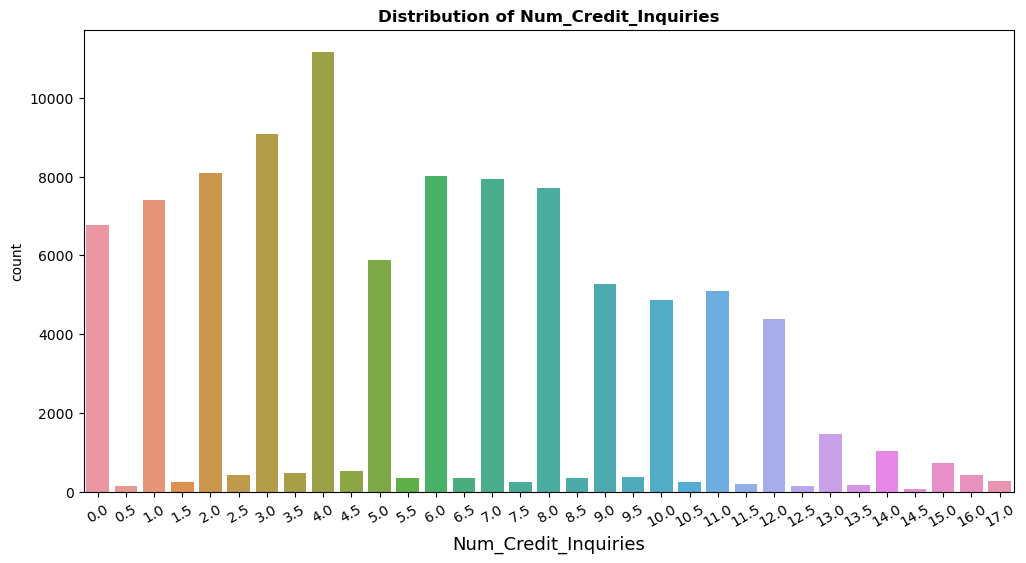

In [64]:
plot_countplot(credit_score_data_train, 'Num_Credit_Inquiries')

Num_credit_inquires is multimodal.

In [65]:
get_column_details(credit_score_data_train, 'Credit_History_Age')

Details of Credit_History_Age column

DataType:  object

Description of the data: count                      90970
unique                       404
top       15 Years and 11 Months
freq                         446
Name: Credit_History_Age, dtype: object

There are  9030  null values

Number of Unique Values:  404

Distribution of column:

15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: Credit_History_Age, Length: 404, dtype: int64


In [66]:
def Month_Converter(val):
    if pd.notnull(val):
        years = int(val.split(' ')[0])
        month = int(val.split(' ')[3])
        return (years*12)+month
    else:
        return val
    
credit_score_data_train['Credit_History_Age'] = credit_score_data_train['Credit_History_Age'].apply(lambda x: Month_Converter(x)).astype(float)

In [67]:
credit_score_data_train['Credit_History_Age'] = credit_score_data_train.groupby('Customer_ID')['Credit_History_Age'].transform(lambda v: v.ffill())
credit_score_data_train['Credit_History_Age'] = credit_score_data_train.groupby('Customer_ID')['Credit_History_Age'].transform(lambda v: v.bfill())
credit_score_data_train['Credit_History_Age'] = credit_score_data_train['Credit_History_Age'].astype('float')

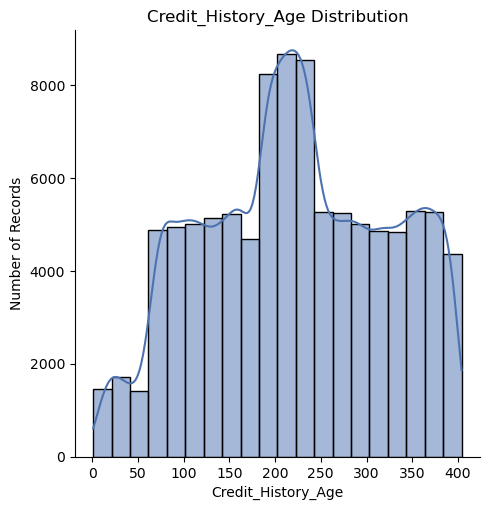

In [68]:
plot_displot(credit_score_data_train, 'Credit_History_Age', 'Credit_History_Age')

Credit History Age seems to be uniform as well.

In [69]:
get_column_details(credit_score_data_train, 'Total_EMI_per_month')

Details of Total_EMI_per_month column

DataType:  float64

Description of the data: count    100000.000000
mean       1403.118217
std        8306.041270
min           0.000000
25%          30.306660
50%          69.249473
75%         161.224249
max       82331.000000
Name: Total_EMI_per_month, dtype: float64

There are no null values

Number of Unique Values:  14950

Distribution of column:

0.000000        10613
49.574949           8
73.533361           8
22.960835           8
38.661127           8
                ...  
36408.000000        1
23760.000000        1
24612.000000        1
24325.000000        1
58638.000000        1
Name: Total_EMI_per_month, Length: 14950, dtype: int64


In [70]:
credit_score_data_train['Total_EMI_per_month'] = credit_score_data_train['Total_EMI_per_month'].apply(lambda x: np.NaN if x>1750 else x)
credit_score_data_train['Total_EMI_per_month'] = credit_score_data_train.groupby('Customer_ID')['Total_EMI_per_month'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

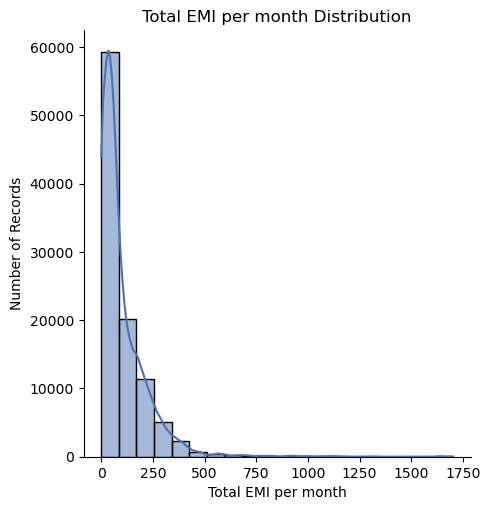

In [71]:
plot_displot(credit_score_data_train, 'Total_EMI_per_month', 'Total EMI per month')

Total emi per month is highly right skewed.

In [72]:
get_column_details(credit_score_data_train, 'Amount_invested_monthly')

Details of Amount_invested_monthly column

DataType:  float64

Description of the data: count    95521.000000
mean       637.412998
std       2043.319327
min          0.000000
25%         74.534002
50%        135.925682
75%        265.731733
max      10000.000000
Name: Amount_invested_monthly, dtype: float64

There are  4479  null values

Number of Unique Values:  91049

Distribution of column:

10000.000000    4305
0.000000         169
80.415295          1
36.662351          1
89.738489          1
                ... 
36.541909          1
93.451163          1
140.809722         1
38.739377          1
167.163865         1
Name: Amount_invested_monthly, Length: 91049, dtype: int64


In [73]:
credit_score_data_train['Amount_invested_monthly'] = credit_score_data_train.groupby('Customer_ID')['Amount_invested_monthly'].apply(lambda x: x.fillna(x.mode()[0]))

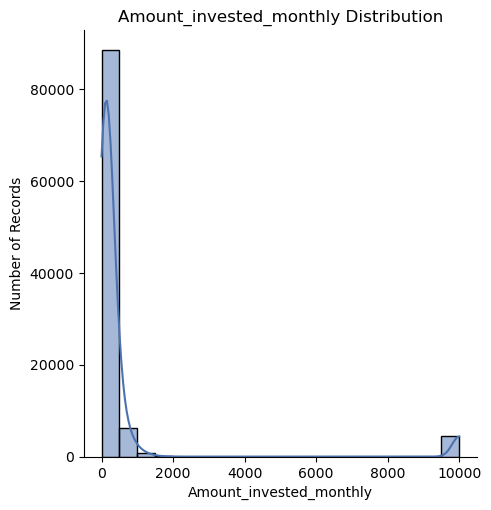

In [74]:
plot_displot(credit_score_data_train, 'Amount_invested_monthly', 'Amount_invested_monthly')

Amount invested monthly is also highly right skewed.

In [75]:
get_column_details(credit_score_data_train, 'Monthly_Balance')

Details of Monthly_Balance column

DataType:  object

Description of the data: count                                98800
unique                               98792
top       __-333333333333333333333333333__
freq                                     9
Name: Monthly_Balance, dtype: object

There are  1200  null values

Number of Unique Values:  98792

Distribution of column:

__-333333333333333333333333333__    9
312.49408867943663                  1
415.32532309844316                  1
252.08489793906085                  1
254.9709216273975                   1
                                   ..
366.2890379762706                   1
151.1882696261166                   1
306.75027851710234                  1
278.8720257394474                   1
393.6736955618808                   1
Name: Monthly_Balance, Length: 98792, dtype: int64


The value '__-333333333333333333333333333__  is replaced with np.nan

In [76]:
def return_null(val):
    if isinstance(val, str) and "__" in val:
        return np.NaN
    else:
        return val

In [77]:
credit_score_data_train['Monthly_Balance'] = credit_score_data_train['Monthly_Balance'].apply(return_null)
credit_score_data_train['Monthly_Balance'] = credit_score_data_train['Monthly_Balance'].astype('float')

In [78]:
credit_score_data_train['Monthly_Balance'] = credit_score_data_train.groupby('Customer_ID')['Monthly_Balance'].apply(lambda x: x.fillna(x.mode()[0]))

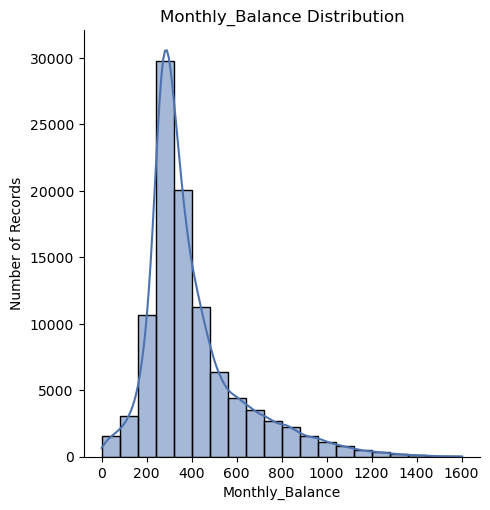

In [79]:
plot_displot(credit_score_data_train, 'Monthly_Balance', 'Monthly_Balance')

Monthly balance seems to be slightly right skewed.

In [80]:
get_column_details(credit_score_data_train, 'Num_of_Loan')

Details of Num_of_Loan column

DataType:  float64

Description of the data: count    100000.000000
mean          3.009960
std          62.647879
min        -100.000000
25%           1.000000
50%           3.000000
75%           5.000000
max        1496.000000
Name: Num_of_Loan, dtype: float64

There are no null values

Number of Unique Values:  414

Distribution of column:

3.0       15104
2.0       15032
4.0       14743
0.0       10930
1.0       10606
          ...  
119.0         1
321.0         1
1439.0        1
663.0         1
966.0         1
Name: Num_of_Loan, Length: 414, dtype: int64


Number_of_loan can not be negative or it is illogical someone to have more than 10 loans.

In [81]:
credit_score_data_train['Num_of_Loan'] = credit_score_data_train['Num_of_Loan'].apply(lambda x: np.NaN if (x>10 or x<0) else x)
credit_score_data_train['Num_of_Loan'] = credit_score_data_train.groupby('Customer_ID')['Num_of_Loan'].transform(lambda v: v.mode()[0])

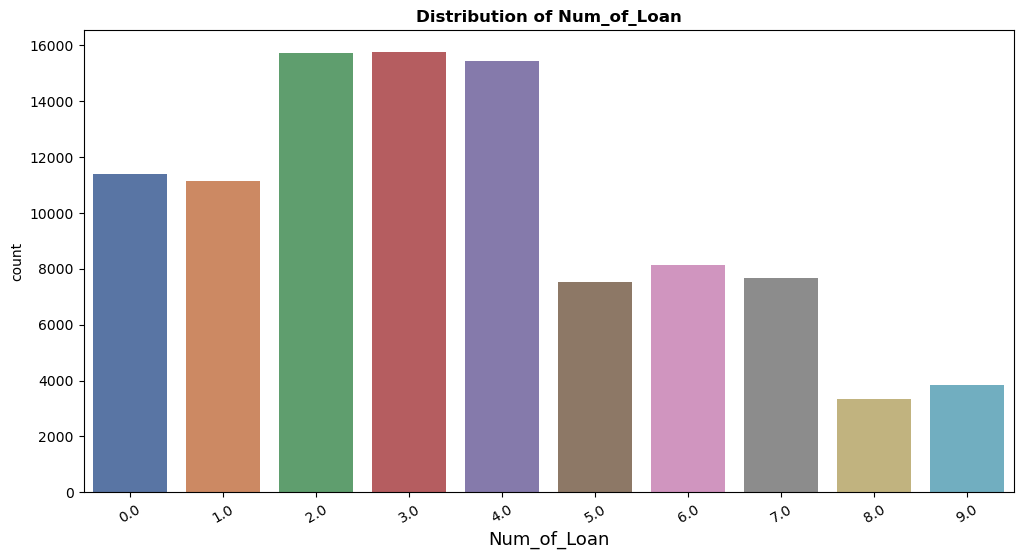

In [82]:
plot_countplot(credit_score_data_train, 'Num_of_Loan')

Num of Loan seems to be concentrated between 2 to 4.

In [83]:
credit_score_data_train.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

We could see that there are still null values, however, these columns would be dropped during the preprocessing part.

In [84]:
credit_score_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        100000 non-null  object  
 1   Customer_ID               100000 non-null  object  
 2   Month                     100000 non-null  int64   
 3   Name                      90015 non-null   object  
 4   Age                       100000 non-null  float64 
 5   SSN                       100000 non-null  object  
 6   Occupation                100000 non-null  category
 7   Annual_Income             100000 non-null  float64 
 8   Monthly_Inhand_Salary     100000 non-null  float64 
 9   Num_Bank_Accounts         100000 non-null  float64 
 10  Num_Credit_Card           100000 non-null  float64 
 11  Interest_Rate             100000 non-null  float64 
 12  Num_of_Loan               100000 non-null  float64 
 13  Type_of_Loan              8859

Let's see what is the correlation between our variables

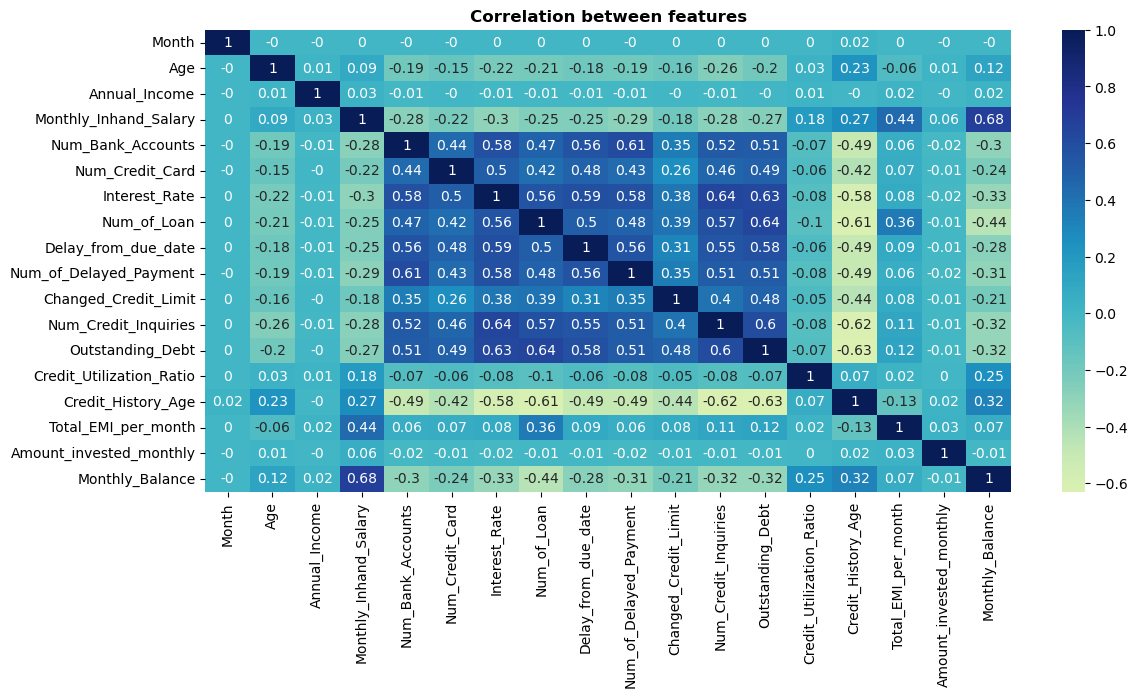

In [85]:
plt.rcParams['figure.figsize']=[13,6]
sns.heatmap(np.round(credit_score_data_train.corr(), 2),cmap='YlGnBu', center = 0, annot = True)
plt.title("Correlation between features", fontweight='bold')
plt.show()

<a id="6"></a> <br> 
## Data tranformation

Firstly, I would separate the categorical columns in the dataset, loop through each column and apply label encoding. LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1.

In [86]:
categorical_columns = ['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

for column in categorical_columns:
    credit_score_data_train[column] = label_encoder.fit_transform(credit_score_data_train[column])

I would drop the columns which we would not use in our models.

In [87]:
print("Size of Dataset before dropping columns : ",credit_score_data_train.shape)
drop_columns = ['ID', 'Name','SSN', 'Type_of_Loan']
credit_score_data_train.drop(drop_columns,axis=1,inplace=True)
print("Size of Dataset after dropping columns : ",credit_score_data_train.shape)

Size of Dataset before dropping columns :  (100000, 28)
Size of Dataset after dropping columns :  (100000, 24)


I would now split the input and output data.

In [88]:
X = credit_score_data_train.drop('Credit_Score',axis=1)
y = credit_score_data_train['Credit_Score']
print(X.shape)
print(y.shape)

(100000, 23)
(100000,)


In [89]:
cat_cols = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

In [90]:
num_cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
            'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan','Delay_from_due_date',
            'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Num_Credit_Inquiries',
            'Outstanding_Debt', 'Credit_Utilization_Ratio','Total_EMI_per_month',
            'Amount_invested_monthly','Monthly_Balance', 'Credit_History_Age']

I would now split the dataset depending on the type of the data in each column in order to apply the scaler and normalize the numeric data. MinMaxScaler transform features by scaling each feature to a given range.

In [91]:
cat_data_train = X[cat_cols]

In [92]:
num_data_train = X[num_cols]

In [93]:
mms_train = MinMaxScaler()
mms_train.fit(num_data_train)

num_data_train = mms_train.transform(num_data_train)
print(num_data_train.shape)

(100000, 17)


In [94]:
# Normalize the data
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

I would now concatenate back the two datasets.

In [95]:
X = np.concatenate([cat_data_train, num_data_train],axis = 1)

I would split the dataset for our models.

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70000, 21)
(30000, 21)
(70000,)
(30000,)


I would create a function which would be used to evaluate our models creating classification report and confusion matrix.

In [97]:
#Method to evaluate the performance of the model
def evaluate_model(y_test,y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    
    print("\n---------------------------------------------\n")
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, cmap='Blues',fmt='.0f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()

<a id="7"></a> <br> 
## Model building

My approach will involve the development of several predictive models, namely Logistic Regression, Random Forest, Decision Tree, Logistic Regression and XG Boost. These models will enable us to delve deeper into the data's predictive potential and evaluate their respective performances.

<a id="8"></a> <br> 
### Random forest

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      5306
           1       0.79      0.83      0.81      8724
           2       0.83      0.81      0.82     15970

    accuracy                           0.81     30000
   macro avg       0.80      0.80      0.80     30000
weighted avg       0.81      0.81      0.81     30000


---------------------------------------------



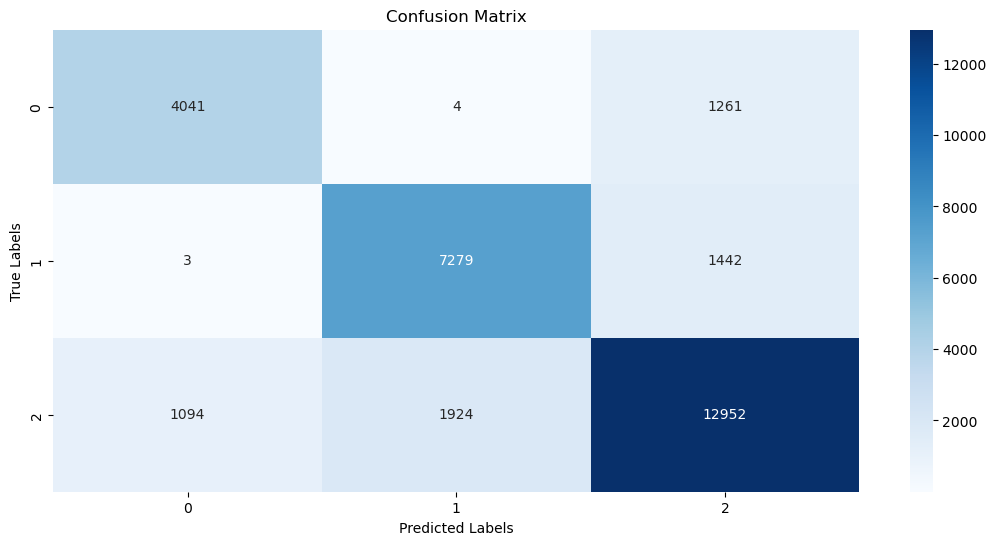

In [98]:
# Creating the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Training the classifier
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)

<a id="9"></a> <br> 
### Decision tree

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      5306
           1       0.74      0.74      0.74      8724
           2       0.76      0.77      0.77     15970

    accuracy                           0.75     30000
   macro avg       0.74      0.74      0.74     30000
weighted avg       0.75      0.75      0.75     30000


---------------------------------------------



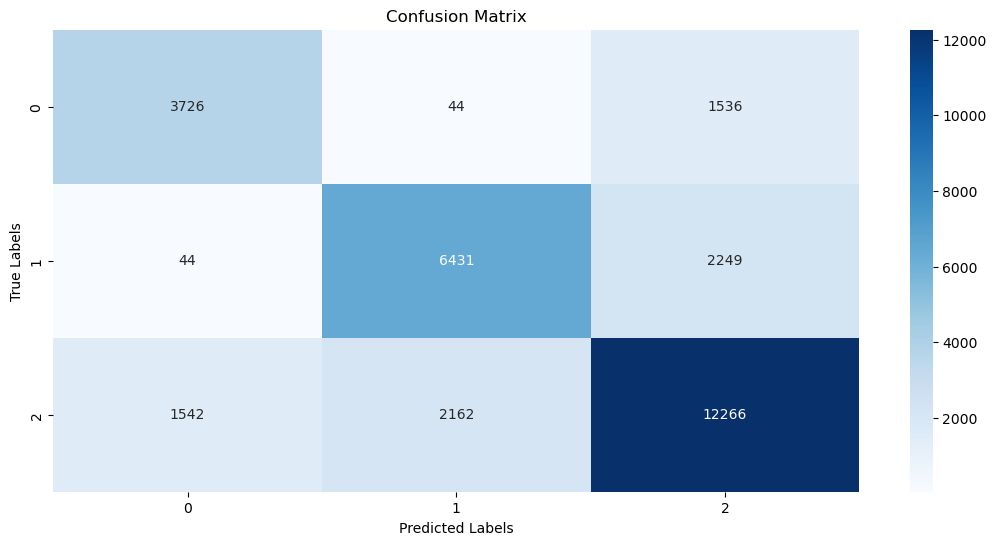

In [99]:
# Creating the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Training the classifier
dt_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)

<a id="10"></a> <br> 
### Logistic Regression

C:\Users\nadya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report
              precision    recall  f1-score   support

           0       0.56      0.55      0.56      5306
           1       0.66      0.52      0.58      8724
           2       0.67      0.75      0.71     15970

    accuracy                           0.65     30000
   macro avg       0.63      0.61      0.61     30000
weighted avg       0.65      0.65      0.64     30000


---------------------------------------------



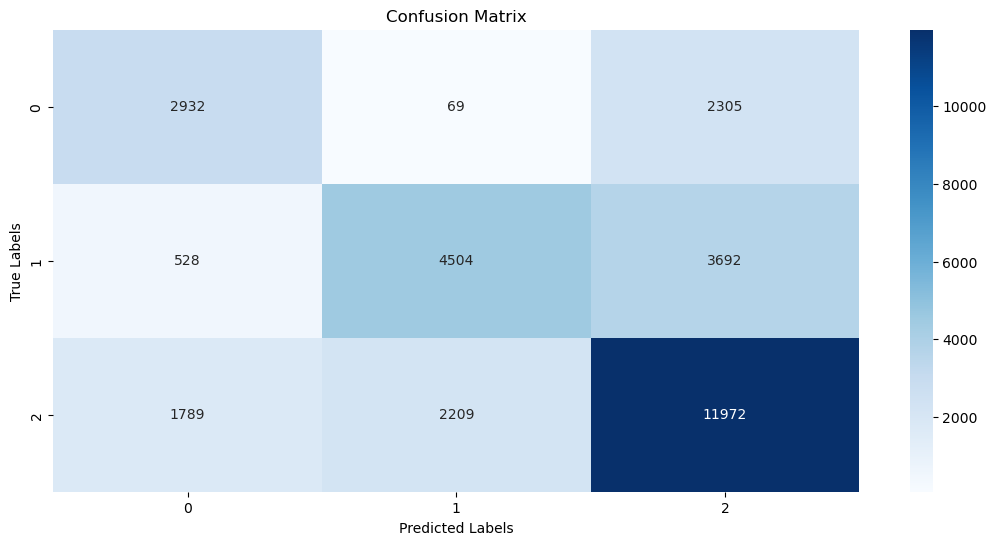

In [100]:
# Creating the Logistic regression classifier
lr_classifier = LogisticRegression()

# Training the classifier
lr_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = lr_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)

<a id="11"></a> <br> 
### K-Nearest Neighbors

C:\Users\nadya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Classification Report
              precision    recall  f1-score   support

           0       0.55      0.60      0.57      5306
           1       0.66      0.62      0.64      8724
           2       0.73      0.73      0.73     15970

    accuracy                           0.68     30000
   macro avg       0.65      0.65      0.65     30000
weighted avg       0.68      0.68      0.68     30000


---------------------------------------------



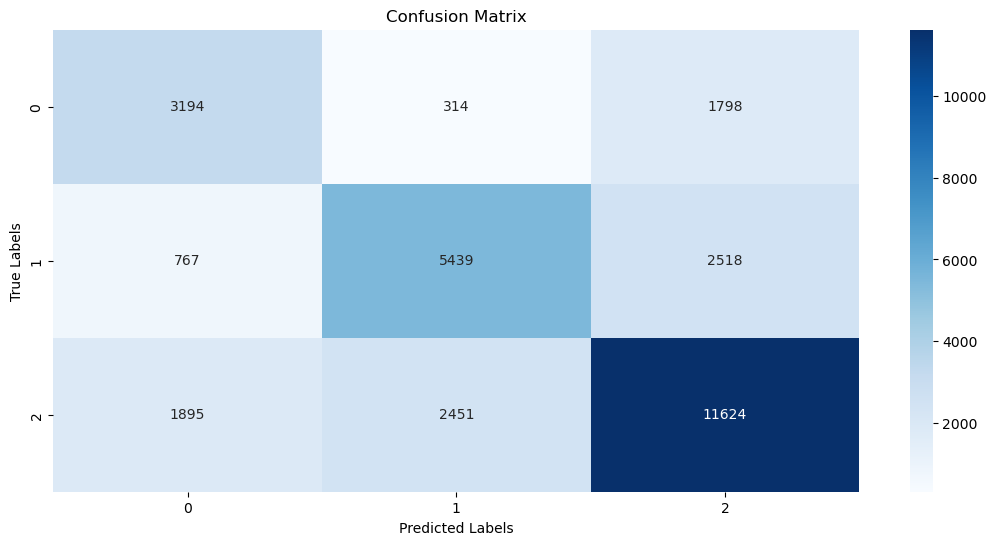

In [101]:
# Creating the KNeighnours classifier
kn_classifier = KNeighborsClassifier()

# Training the classifier
kn_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = kn_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)

<a id="12"></a> <br> 
### XGBoost

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      5306
           1       0.77      0.76      0.76      8724
           2       0.80      0.79      0.79     15970

    accuracy                           0.77     30000
   macro avg       0.75      0.76      0.76     30000
weighted avg       0.77      0.77      0.77     30000


---------------------------------------------



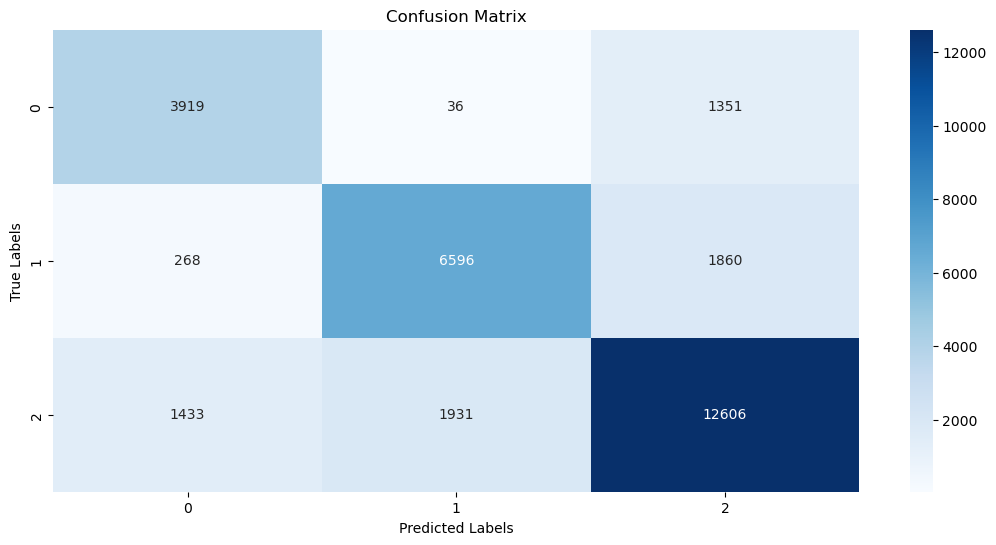

In [102]:
# Creating the XGB classifier
xgb_classifier = xgb.XGBClassifier()

# Training the classifier
xgb_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)

Considering the models applied we could say that the top three models with highest accuracy are:
   1. Random Forest
   2. XGB 
   3. Decision tree
   
I would apply this three models to the second dataset in order to predict the Credit Score.

<a id="13"></a> <br> 
## Cleaning the test dataset

Firstly, I would drop the columns which would not be used similar to the train dataset.

In [103]:
print("Size of Dataset before dropping columns : ",credit_score_data_test.shape)
drop_columns_test = ['ID','Name','SSN', 'Type_of_Loan']
credit_score_data_test.drop(drop_columns_test,axis=1,inplace=True)
print("Size of Dataset after dropping columns : ",credit_score_data_test.shape)

Size of Dataset before dropping columns :  (50000, 27)
Size of Dataset after dropping columns :  (50000, 23)


In [104]:
credit_score_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               50000 non-null  object 
 1   Month                     50000 non-null  object 
 2   Age                       50000 non-null  object 
 3   Occupation                50000 non-null  object 
 4   Annual_Income             50000 non-null  object 
 5   Monthly_Inhand_Salary     42502 non-null  float64
 6   Num_Bank_Accounts         50000 non-null  int64  
 7   Num_Credit_Card           50000 non-null  int64  
 8   Interest_Rate             50000 non-null  int64  
 9   Num_of_Loan               50000 non-null  object 
 10  Delay_from_due_date       50000 non-null  int64  
 11  Num_of_Delayed_Payment    46502 non-null  object 
 12  Changed_Credit_Limit      50000 non-null  object 
 13  Num_Credit_Inquiries      48965 non-null  float64
 14  Credit

I would start cleaning the test dataset applying the same methods used above. Overall, I could say that the problems which was found during the cleaning of the train dataset are the same for the test dataset.

In [105]:
get_column_details(credit_score_data_test, 'Payment_of_Min_Amount')

Details of Payment_of_Min_Amount column

DataType:  object

Description of the data: count     50000
unique        3
top         Yes
freq      26158
Name: Payment_of_Min_Amount, dtype: object

There are no null values

Number of Unique Values:  3

Distribution of column:

Yes    26158
No     17849
NM      5993
Name: Payment_of_Min_Amount, dtype: int64


In [106]:
credit_score_data_test['Payment_of_Min_Amount'] = credit_score_data_test['Payment_of_Min_Amount'].astype('category')

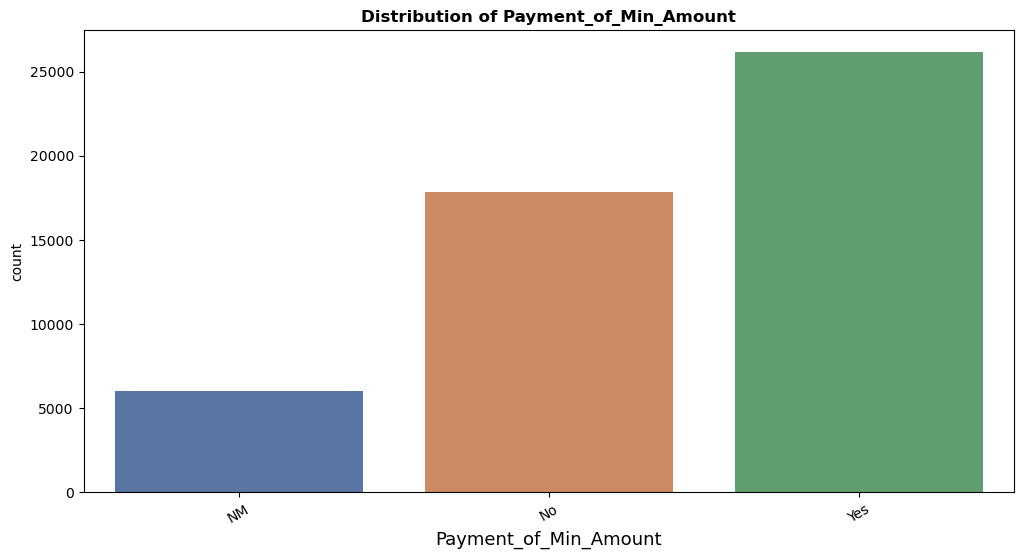

In [107]:
plot_countplot(credit_score_data_test, 'Payment_of_Min_Amount')

In [108]:
get_column_details(credit_score_data_test, "Occupation")

Details of Occupation column

DataType:  object

Description of the data: count       50000
unique         16
top       _______
freq         3438
Name: Occupation, dtype: object

There are no null values

Number of Unique Values:  16

Distribution of column:

_______          3438
Lawyer           3324
Engineer         3212
Architect        3195
Mechanic         3168
Developer        3146
Accountant       3133
Media_Manager    3130
Scientist        3104
Teacher          3103
Entrepreneur     3103
Journalist       3037
Doctor           3027
Manager          3000
Musician         2947
Writer           2933
Name: Occupation, dtype: int64


7062 records are marked with populater with '_______' which would be replaced with np.NaN.

In [109]:
credit_score_data_test['Occupation'] = credit_score_data_test['Occupation'].apply(lambda x: np.NaN if x == '_______' else x)
credit_score_data_test['Occupation'] = credit_score_data_test.groupby('Customer_ID')['Occupation'].apply(lambda x: x.fillna(x.mode()[0]))
credit_score_data_test['Occupation'] = credit_score_data_test['Occupation'].astype('category')

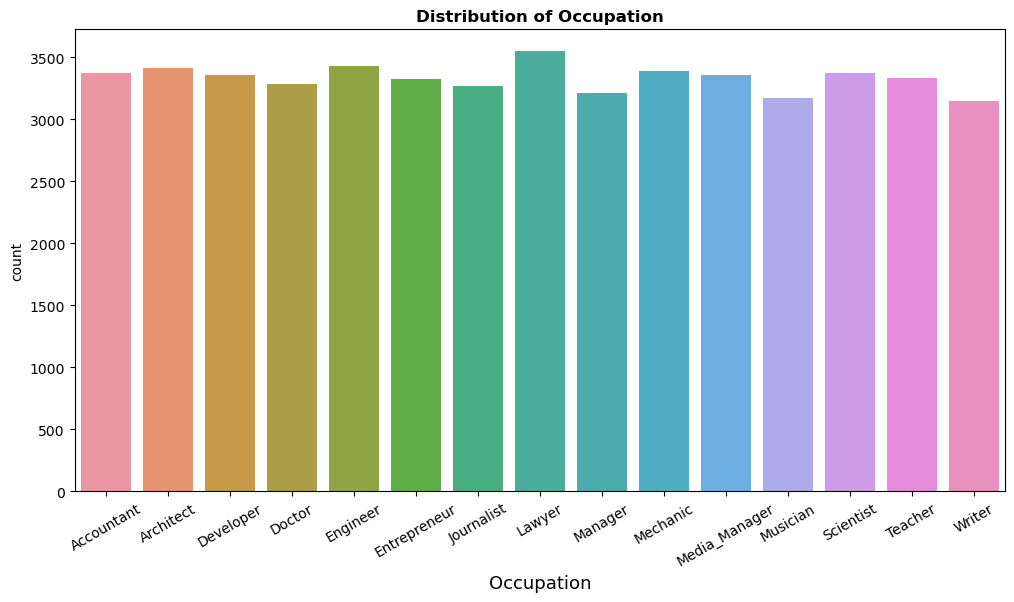

In [110]:
plot_countplot(credit_score_data_test, "Occupation")

In [111]:
get_column_details(credit_score_data_test, "Payment_Behaviour")

Details of Payment_Behaviour column

DataType:  object

Description of the data: count                              50000
unique                                 7
top       Low_spent_Small_value_payments
freq                               12694
Name: Payment_Behaviour, dtype: object

There are no null values

Number of Unique Values:  7

Distribution of column:

Low_spent_Small_value_payments      12694
High_spent_Medium_value_payments     8922
High_spent_Large_value_payments      6844
Low_spent_Medium_value_payments      6837
High_spent_Small_value_payments      5651
Low_spent_Large_value_payments       5252
!@9#%8                               3800
Name: Payment_Behaviour, dtype: int64


I would replace the '!@9#%8' with np.NaN.

In [112]:
credit_score_data_test['Payment_Behaviour'] = credit_score_data_test['Payment_Behaviour'].apply(lambda x: np.NaN if x == "!@9#%8" else x)
credit_score_data_test['Payment_Behaviour'] = credit_score_data_test.groupby('Customer_ID')['Payment_Behaviour'].apply(lambda x: x.fillna(x.mode()[0]))
credit_score_data_test['Payment_Behaviour'] = credit_score_data_test['Payment_Behaviour'].astype('category')

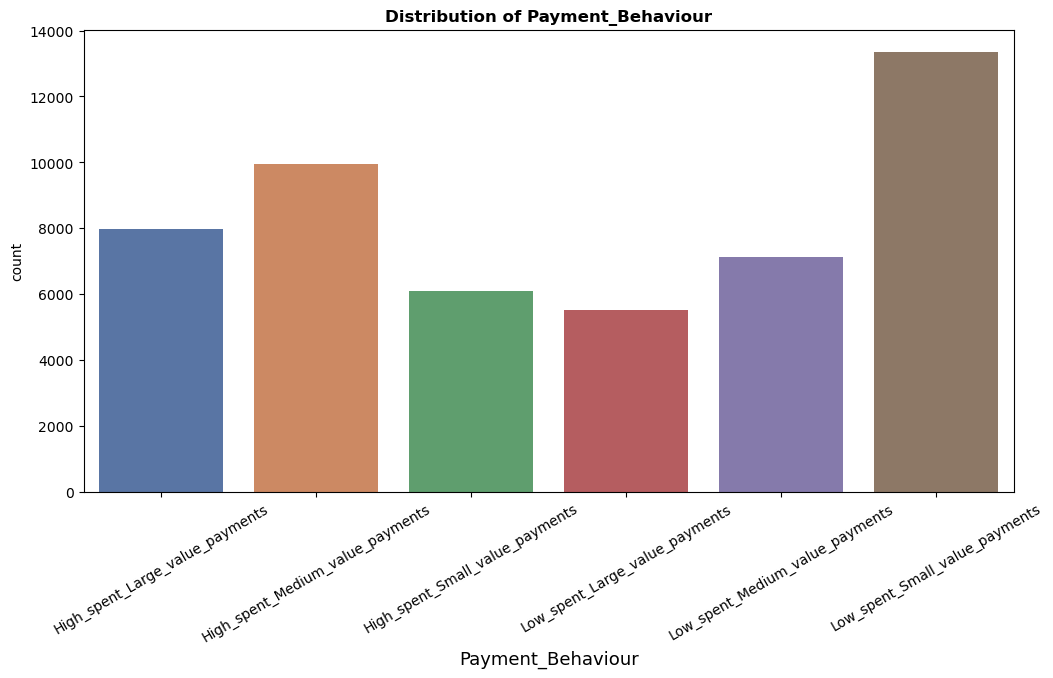

In [113]:
plot_countplot(credit_score_data_test, 'Payment_Behaviour')

In [114]:
get_column_details(credit_score_data_test, "Credit_Mix")

Details of Credit_Mix column

DataType:  object

Description of the data: count        50000
unique           4
top       Standard
freq         18379
Name: Credit_Mix, dtype: object

There are no null values

Number of Unique Values:  4

Distribution of column:

Standard    18379
Good        12260
_            9805
Bad          9556
Name: Credit_Mix, dtype: int64


The _ would be replaced with np.NaN.

In [115]:
credit_score_data_test['Credit_Mix'] = credit_score_data_test['Credit_Mix'].apply(lambda x: np.NaN if x == "_" else x)

In [116]:
credit_score_data_test['Credit_Mix'] = credit_score_data_test.groupby('Customer_ID')['Credit_Mix'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
credit_score_data_test['Credit_Mix'] = credit_score_data_test['Credit_Mix'].astype('category')

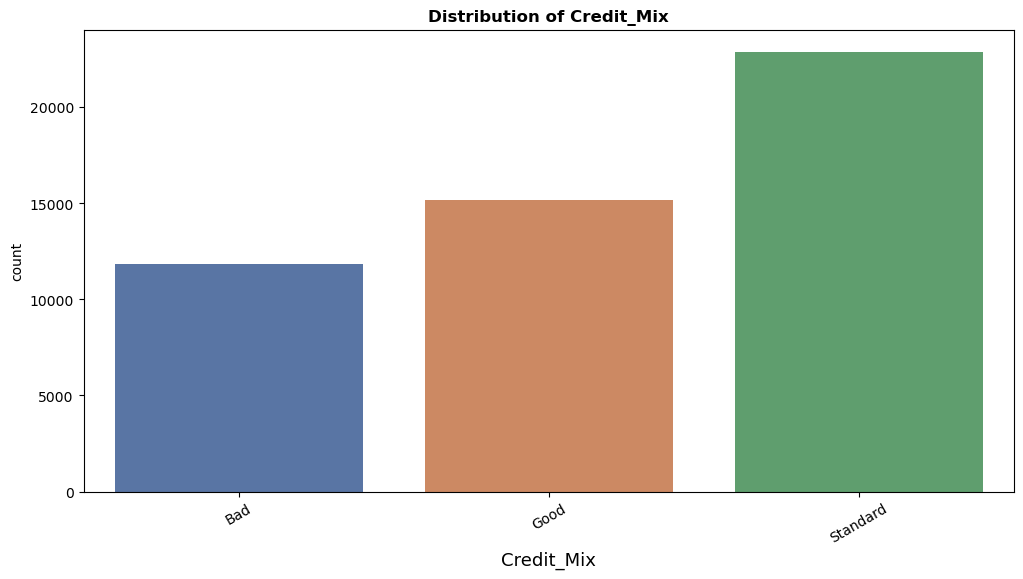

In [117]:
plot_countplot(credit_score_data_test, 'Credit_Mix')

I would try to remove all leading and trailing _ with np.NaN from the numeric columns.

In [118]:
cols_test=['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Num_Bank_Accounts', 'Num_Credit_Card']
for col in cols_test:
    credit_score_data_test[col] = credit_score_data_test[col].apply(lambda x: x if x is np.nan or not isinstance(x, str)
        else x.replace("_","")).replace("",np.nan)
    credit_score_data_test[col] = credit_score_data_test[col].astype('float')

In [119]:
get_column_details(credit_score_data_test, "Age")

Details of Age column

DataType:  float64

Description of the data: count    50000.000000
mean       109.714420
std        679.696381
min       -500.000000
25%         25.000000
50%         34.000000
75%         43.000000
max       8688.000000
Name: Age, dtype: float64

There are no null values

Number of Unique Values:  928

Distribution of column:

39.0      1570
32.0      1529
44.0      1500
22.0      1493
35.0      1483
          ... 
1419.0       1
120.0        1
2552.0       1
2698.0       1
4975.0       1
Name: Age, Length: 928, dtype: int64


There is lots of dirty data in column Age.

After cleaning up Age value, 43 distinct Age remains.

In [120]:
credit_score_data_test['Age'] = credit_score_data_test['Age'].apply(lambda x: x if x is np.nan or not isinstance(x, str)
                    else x.replace("_","")).replace("",np.nan)
credit_score_data_test['Age'] = credit_score_data_test['Age'].astype('int')

In [121]:
credit_score_data_test['Age'] = credit_score_data_test['Age'].apply(clean_age)
credit_score_data_test['Age'] = credit_score_data_test.groupby('Customer_ID')['Age'].transform(lambda x: x.mode()[0])

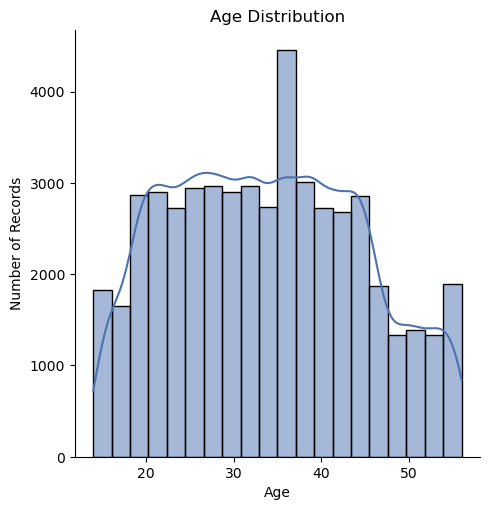

In [122]:
plot_displot(credit_score_data_test, 'Age', 'Age')

In [123]:
get_column_details(credit_score_data_test, "Monthly_Inhand_Salary")

Details of Monthly_Inhand_Salary column

DataType:  float64

Description of the data: count    42502.000000
mean      4182.004291
std       3174.109304
min        303.645417
25%       1625.188333
50%       3086.305000
75%       5934.189094
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

There are  7498  null values

Number of Unique Values:  12793

Distribution of column:

1315.560833     8
6639.560000     7
2295.058333     7
6082.187500     7
536.431250      7
               ..
12386.966240    1
5993.870000     1
6763.330000     1
7729.695181     1
2312.785000     1
Name: Monthly_Inhand_Salary, Length: 12793, dtype: int64


There are null values present which shall be cleaned but there are no outliers in the data.

In [124]:
credit_score_data_test['Monthly_Inhand_Salary'] = credit_score_data_test.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda v: v.mean())
credit_score_data_test['Monthly_Inhand_Salary'] = credit_score_data_test['Monthly_Inhand_Salary'].astype('float')

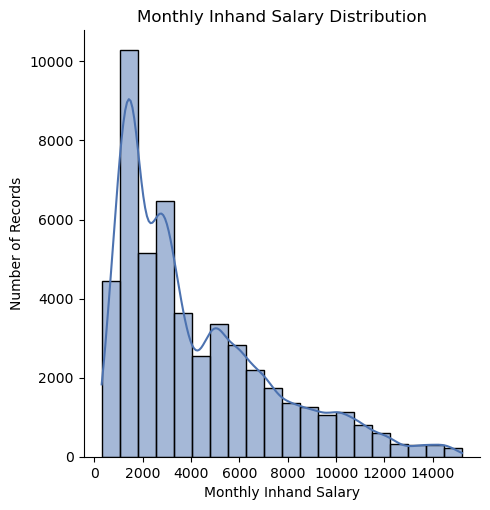

In [125]:
plot_displot(credit_score_data_test, 'Monthly_Inhand_Salary', 'Monthly Inhand Salary')

In [126]:
get_column_details(credit_score_data_test, "Interest_Rate")

Details of Interest_Rate column

DataType:  int64

Description of the data: count    50000.000000
mean        68.772640
std        451.602363
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max       5799.000000
Name: Interest_Rate, dtype: float64

There are no null values

Number of Unique Values:  945

Distribution of column:

8       2503
5       2500
6       2368
12      2288
10      2259
        ... 
1573       1
3279       1
1166       1
5613       1
4252       1
Name: Interest_Rate, Length: 945, dtype: int64


There were outliers present, after cleaning them up, interest rate ranges from 1% to 34%.

In [127]:
credit_score_data_test['Interest_Rate'] = credit_score_data_test['Interest_Rate'].apply(lambda x: np.NaN if x>34 else x)
credit_score_data_test['Interest_Rate'] = credit_score_data_test.groupby('Customer_ID')['Interest_Rate'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

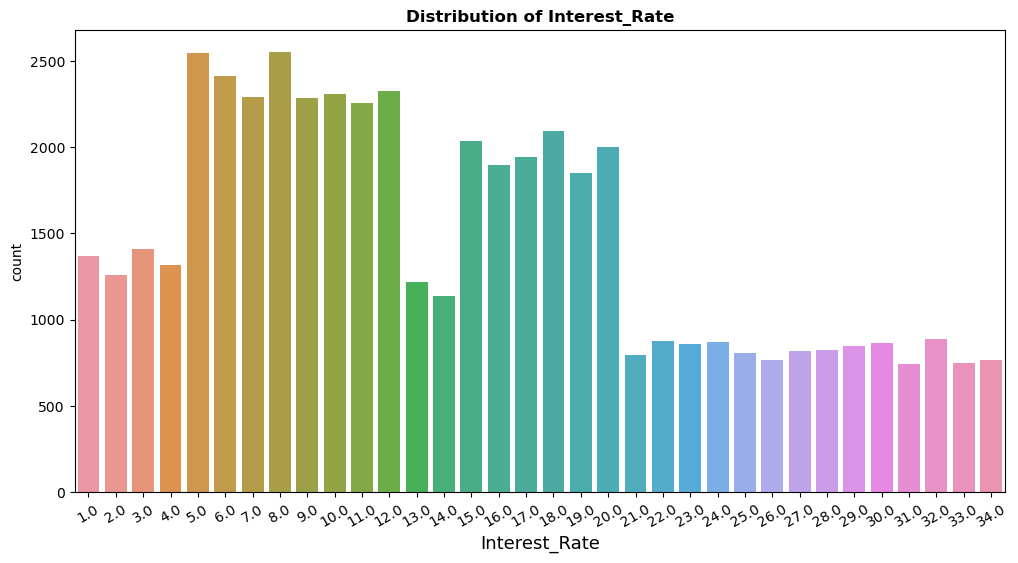

In [128]:
plot_countplot(credit_score_data_test, 'Interest_Rate')

In [129]:
get_column_details(credit_score_data_test, 'Delay_from_due_date')

Details of Delay_from_due_date column

DataType:  int64

Description of the data: count    50000.000000
mean        21.052640
std         14.860397
min         -5.000000
25%         10.000000
50%         18.000000
75%         28.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64

There are no null values

Number of Unique Values:  73

Distribution of column:

 13    1761
 15    1759
 8     1680
 9     1656
 10    1645
       ... 
 65      30
 63      21
-5       18
 66      12
 67       7
Name: Delay_from_due_date, Length: 73, dtype: int64


In [130]:
credit_score_data_test['Delay_from_due_date'] = credit_score_data_test['Delay_from_due_date'].apply(lambda x: np.NaN if x<0 else x)
credit_score_data_test['Delay_from_due_date'] = credit_score_data_test.groupby('Customer_ID')['Delay_from_due_date'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

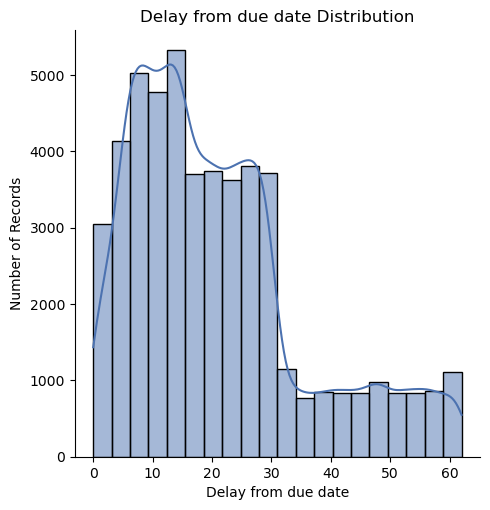

In [131]:
plot_displot(credit_score_data_test, 'Delay_from_due_date', 'Delay from due date')

In [132]:
get_column_details(credit_score_data_test, 'Num_Bank_Accounts')

Details of Num_Bank_Accounts column

DataType:  float64

Description of the data: count    50000.000000
mean        16.838260
std        116.396848
min         -1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max       1798.000000
Name: Num_Bank_Accounts, dtype: float64

There are no null values

Number of Unique Values:  540

Distribution of column:

6.0       6504
7.0       6408
8.0       6387
4.0       6100
5.0       6068
          ... 
855.0        1
1262.0       1
908.0        1
603.0        1
1727.0       1
Name: Num_Bank_Accounts, Length: 540, dtype: int64


There are some outliers,also negative values in Num Bank Accounts.
After cleaning, there are 11 possible value of this field - Num Bank Accounts ranging from 0 to 10.

In [133]:
credit_score_data_test['Num_Bank_Accounts'].replace(-1, 0, inplace=True)
credit_score_data_test['Num_Bank_Accounts'] = credit_score_data_test['Num_Bank_Accounts'].apply(lambda x: np.NaN if x>10 else x)
credit_score_data_test['Num_Bank_Accounts'] = credit_score_data_test.groupby('Customer_ID')['Num_Bank_Accounts'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

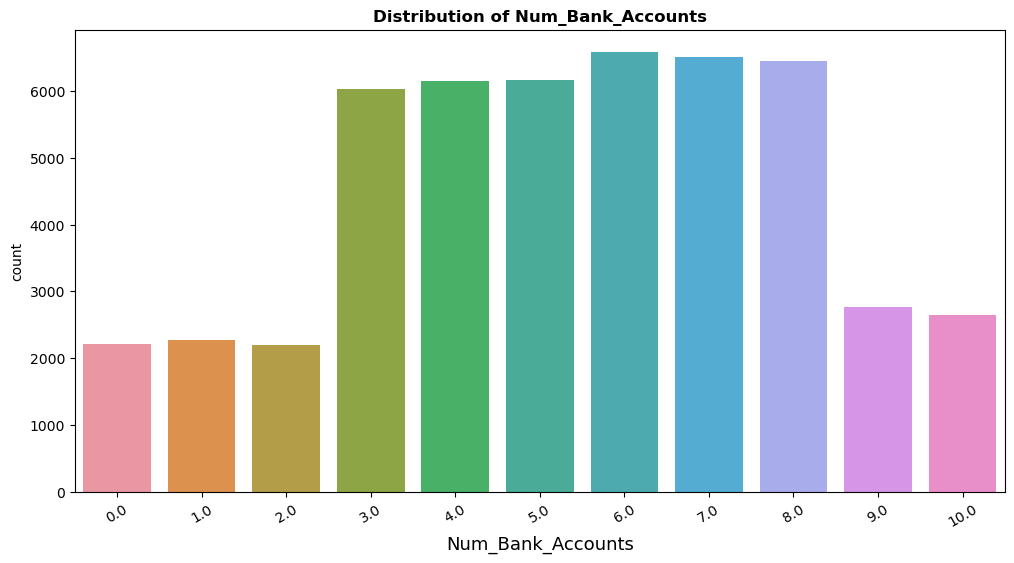

In [134]:
plot_countplot(credit_score_data_test, 'Num_Bank_Accounts')

In [135]:
get_column_details(credit_score_data_test, 'Num_Credit_Card')

Details of Num_Credit_Card column

DataType:  float64

Description of the data: count    50000.000000
mean        22.921480
std        129.314804
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max       1499.000000
Name: Num_Credit_Card, dtype: float64

There are no null values

Number of Unique Values:  819

Distribution of column:

5.0       9210
7.0       8271
6.0       8243
4.0       7072
3.0       6539
          ... 
662.0        1
445.0        1
78.0         1
1488.0       1
955.0        1
Name: Num_Credit_Card, Length: 819, dtype: int64


There are outliers present in the field as there are 819 unique values of number of credit card.

In [136]:
credit_score_data_test['Num_Credit_Card'] = credit_score_data_test['Num_Credit_Card'].apply(lambda x: np.NaN if x>10 else x)
credit_score_data_test['Num_Credit_Card'] = credit_score_data_test.groupby('Customer_ID')['Num_Credit_Card'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

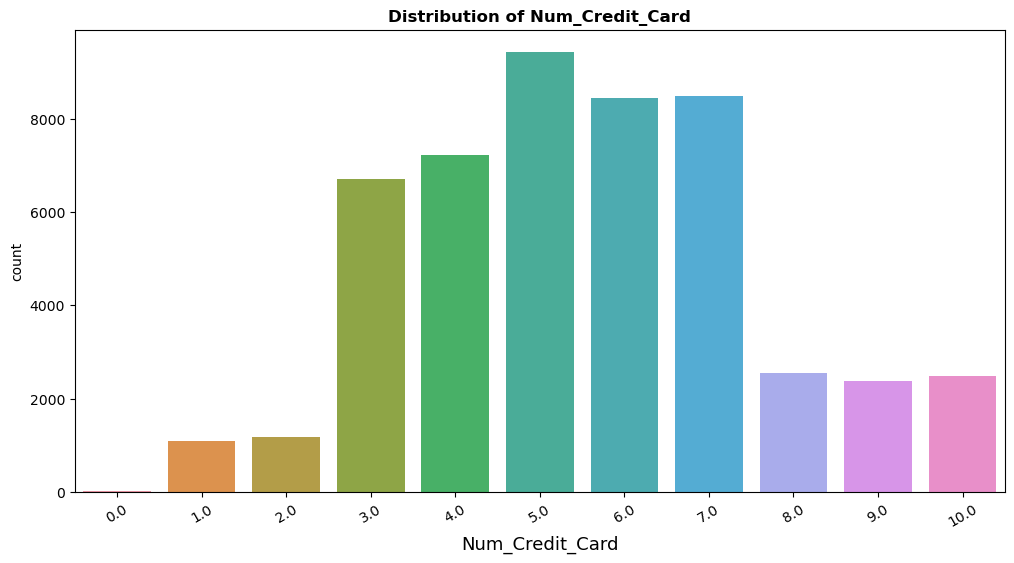

In [137]:
plot_countplot(credit_score_data_test, 'Num_Credit_Card')

In [138]:
get_column_details(credit_score_data_test, 'Num_of_Delayed_Payment')

Details of Num_of_Delayed_Payment column

DataType:  float64

Description of the data: count    46502.000000
mean        30.888951
std        221.510461
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4399.000000
Name: Num_of_Delayed_Payment, dtype: float64

There are  3498  null values

Number of Unique Values:  411

Distribution of column:

19.0      2707
15.0      2674
16.0      2637
17.0      2636
18.0      2631
          ... 
1146.0       1
288.0        1
3556.0       1
3393.0       1
2034.0       1
Name: Num_of_Delayed_Payment, Length: 411, dtype: int64


We could see that there are outliers present in the dataset.

In [139]:
credit_score_data_test['Num_of_Delayed_Payment'] = credit_score_data_test['Num_of_Delayed_Payment'].apply(lambda x: np.NaN if (x>30 or x<0) else x)
credit_score_data_test['Num_of_Delayed_Payment'] = credit_score_data_test.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

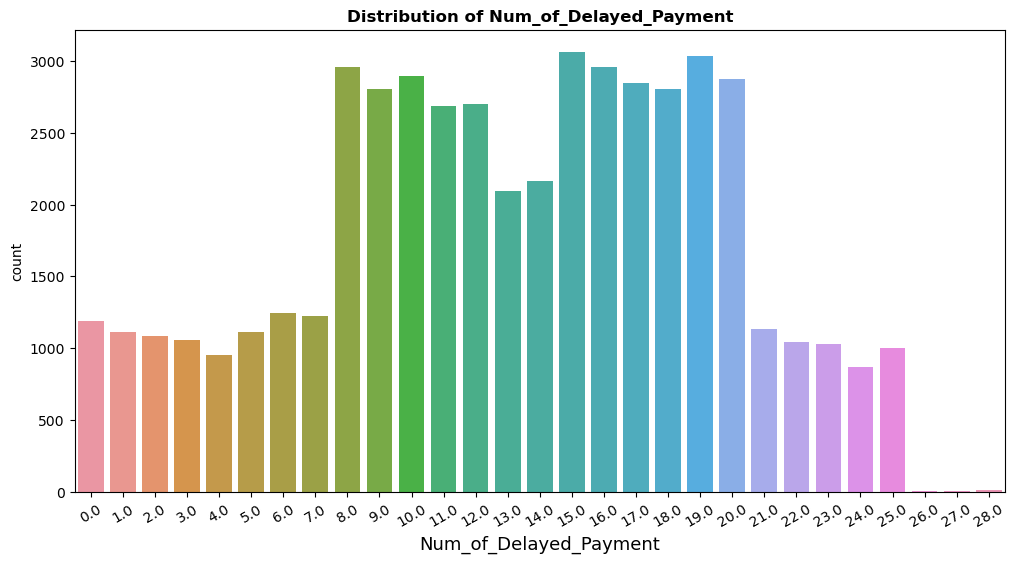

In [140]:
plot_countplot(credit_score_data_test, 'Num_of_Delayed_Payment')

In [141]:
get_column_details(credit_score_data_test, 'Changed_Credit_Limit')

Details of Changed_Credit_Limit column

DataType:  float64

Description of the data: count    48941.000000
mean        10.374844
std          6.780628
min         -6.450000
25%          5.340000
50%          9.410000
75%         14.800000
max         36.650000
Name: Changed_Credit_Limit, dtype: float64

There are  1059  null values

Number of Unique Values:  3926

Distribution of column:

 11.50    70
 11.32    63
 7.35     60
 7.01     60
 10.06    57
          ..
 31.51     1
-3.92      1
 28.07     1
 26.38     1
 29.17     1
Name: Changed_Credit_Limit, Length: 3926, dtype: int64


There are null values which shall be cleaned.

In [142]:
credit_score_data_test['Changed_Credit_Limit'] =credit_score_data_test.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda v: v.mode()[0])

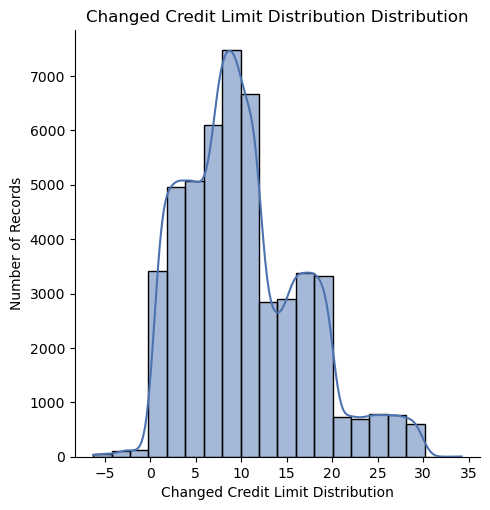

In [143]:
plot_displot(credit_score_data_test, 'Changed_Credit_Limit', 'Changed Credit Limit Distribution')

In [144]:
get_column_details(credit_score_data_test, 'Num_Credit_Inquiries')

Details of Num_Credit_Inquiries column

DataType:  float64

Description of the data: count    48965.000000
mean        30.080200
std        196.984121
min          0.000000
25%          4.000000
50%          7.000000
75%         10.000000
max       2593.000000
Name: Num_Credit_Inquiries, dtype: float64

There are  1035  null values

Number of Unique Values:  750

Distribution of column:

5.0       4709
4.0       4402
6.0       4375
7.0       4295
8.0       3922
          ... 
1471.0       1
307.0        1
1326.0       1
904.0        1
352.0        1
Name: Num_Credit_Inquiries, Length: 750, dtype: int64


In [145]:
credit_score_data_test['Num_Credit_Inquiries'].quantile([0.10, 0.85, 0.98, 0.985, 0.99])

0.100       2.00
0.850      12.00
0.980      17.00
0.985     366.00
0.990    1151.44
Name: Num_Credit_Inquiries, dtype: float64

In [146]:
credit_score_data_test['Num_Credit_Inquiries'] = credit_score_data_test.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda v: v.median())
credit_score_data_test['Num_Credit_Inquiries'] = credit_score_data_test['Num_Credit_Inquiries'].astype('float')

In [147]:
get_column_details(credit_score_data_test, 'Credit_History_Age')

Details of Credit_History_Age column

DataType:  object

Description of the data: count                     45530
unique                      399
top       20 Years and 1 Months
freq                        254
Name: Credit_History_Age, dtype: object

There are  4470  null values

Number of Unique Values:  399

Distribution of column:

20 Years and 1 Months     254
16 Years and 1 Months     254
18 Years and 7 Months     252
19 Years and 7 Months     252
18 Years and 6 Months     250
                         ... 
4 Years and 5 Months       21
0 Years and 11 Months      16
33 Years and 11 Months     15
34 Years and 0 Months      14
0 Years and 10 Months      13
Name: Credit_History_Age, Length: 399, dtype: int64


In [148]:
credit_score_data_test['Credit_History_Age'] = credit_score_data_test['Credit_History_Age'].apply(lambda x: Month_Converter(x)).astype(float)

In [149]:
credit_score_data_test['Credit_History_Age'] = credit_score_data_test.groupby('Customer_ID')['Credit_History_Age'].transform(lambda v: v.ffill())
credit_score_data_test['Credit_History_Age'] = credit_score_data_test.groupby('Customer_ID')['Credit_History_Age'].transform(lambda v: v.bfill())
credit_score_data_test['Credit_History_Age'] = credit_score_data_test['Credit_History_Age'].astype('float')

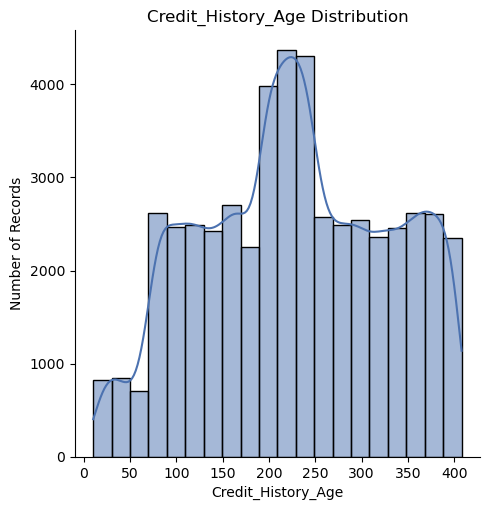

In [150]:
plot_displot(credit_score_data_test, 'Credit_History_Age', 'Credit_History_Age')

In [151]:
get_column_details(credit_score_data_test, 'Total_EMI_per_month')

Details of Total_EMI_per_month column

DataType:  float64

Description of the data: count    50000.000000
mean      1491.304305
std       8595.647887
min          0.000000
25%         32.222388
50%         74.733349
75%        176.157491
max      82398.000000
Name: Total_EMI_per_month, dtype: float64

There are no null values

Number of Unique Values:  13144

Distribution of column:

0.000000        5002
49.574949          4
16.941903          4
420.199367         4
550.679394         4
                ... 
65628.000000       1
92.396923          1
191.296729         1
61274.000000       1
50090.000000       1
Name: Total_EMI_per_month, Length: 13144, dtype: int64


In [152]:
credit_score_data_test['Total_EMI_per_month'] = credit_score_data_test['Total_EMI_per_month'].apply(lambda x: np.NaN if x>1750 else x)
credit_score_data_test['Total_EMI_per_month'] = credit_score_data_test.groupby('Customer_ID')['Total_EMI_per_month'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

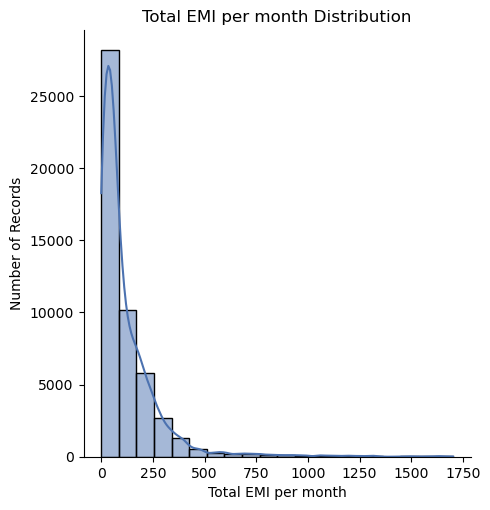

In [153]:
plot_displot(credit_score_data_test, 'Total_EMI_per_month', 'Total EMI per month')

In [154]:
get_column_details(credit_score_data_test, 'Amount_invested_monthly')

Details of Amount_invested_monthly column

DataType:  float64

Description of the data: count    47729.000000
mean       641.654795
std       2053.895420
min          0.000000
25%         74.529270
50%        135.590430
75%        266.892228
max      10000.000000
Name: Amount_invested_monthly, dtype: float64

There are  2271  null values

Number of Unique Values:  45450

Distribution of column:

10000.000000    2175
0.000000         106
236.642682         1
160.097717         1
320.456645         1
                ... 
197.217131         1
366.231484         1
34.899406          1
256.908305         1
220.457878         1
Name: Amount_invested_monthly, Length: 45450, dtype: int64


In [155]:
credit_score_data_test['Amount_invested_monthly'] = credit_score_data_test.groupby('Customer_ID')['Amount_invested_monthly'].apply(lambda x: x.fillna(x.mode()[0]))

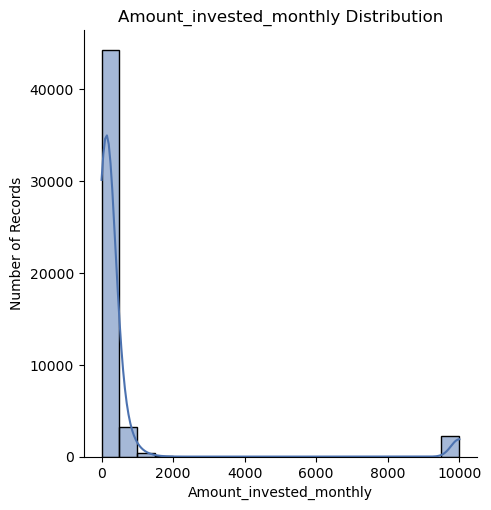

In [156]:
plot_displot(credit_score_data_test, 'Amount_invested_monthly', 'Amount_invested_monthly')

In [157]:
get_column_details(credit_score_data_test, 'Monthly_Balance')

Details of Monthly_Balance column

DataType:  object

Description of the data: count                                49438
unique                               49433
top       __-333333333333333333333333333__
freq                                     6
Name: Monthly_Balance, dtype: object

There are  562  null values

Number of Unique Values:  49433

Distribution of column:

__-333333333333333333333333333__    6
186.26670208571772                  1
223.40782977501067                  1
305.43786598764547                  1
389.53754307843735                  1
                                   ..
421.25686767906984                  1
194.44026842190848                  1
299.957837924029                    1
375.897928536186                    1
360.37968260123847                  1
Name: Monthly_Balance, Length: 49433, dtype: int64


In [158]:
credit_score_data_test['Monthly_Balance'] = credit_score_data_test['Monthly_Balance'].apply(return_null)
credit_score_data_test['Monthly_Balance'] = credit_score_data_test['Monthly_Balance'].astype('float')

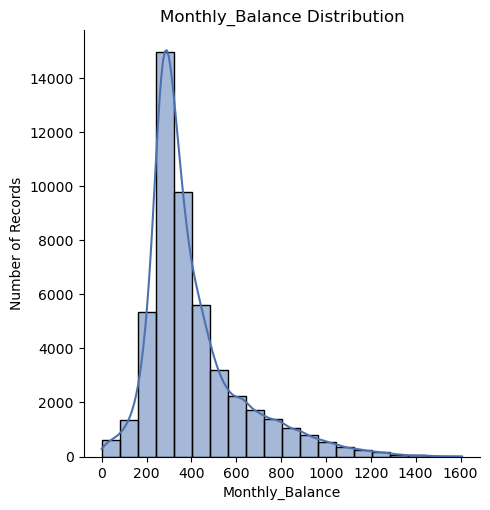

In [159]:
plot_displot(credit_score_data_test, 'Monthly_Balance', 'Monthly_Balance')

In [160]:
get_column_details(credit_score_data_test, 'Num_of_Loan')

Details of Num_of_Loan column

DataType:  float64

Description of the data: count    50000.000000
mean         3.403360
std         66.364023
min       -100.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1496.000000
Name: Num_of_Loan, dtype: float64

There are no null values

Number of Unique Values:  252

Distribution of column:

2.0       7515
3.0       7514
4.0       7368
0.0       5446
1.0       5295
          ... 
621.0        1
1040.0       1
1496.0       1
570.0        1
1296.0       1
Name: Num_of_Loan, Length: 252, dtype: int64


In [161]:
credit_score_data_test['Num_of_Loan'] = credit_score_data_test['Num_of_Loan'].apply(lambda x: np.NaN if (x>10 or x<0) else x)
credit_score_data_test['Num_of_Loan'] = credit_score_data_test.groupby('Customer_ID')['Num_of_Loan'].transform(lambda v: v.mode()[0])

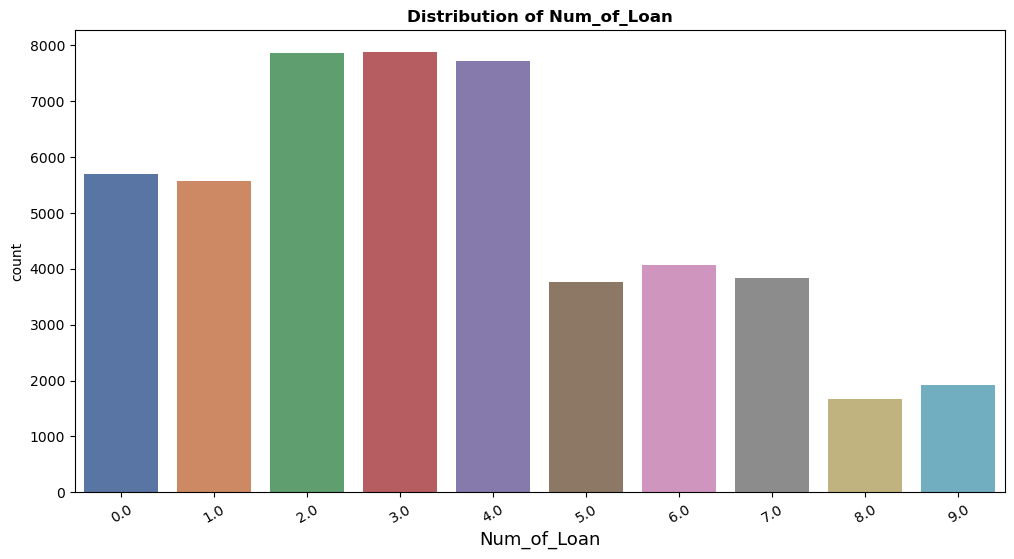

In [162]:
plot_countplot(credit_score_data_test, 'Num_of_Loan')

In [163]:
credit_score_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer_ID               50000 non-null  object  
 1   Month                     50000 non-null  object  
 2   Age                       50000 non-null  float64 
 3   Occupation                50000 non-null  category
 4   Annual_Income             50000 non-null  float64 
 5   Monthly_Inhand_Salary     49972 non-null  float64 
 6   Num_Bank_Accounts         49984 non-null  float64 
 7   Num_Credit_Card           49968 non-null  float64 
 8   Interest_Rate             50000 non-null  float64 
 9   Num_of_Loan               50000 non-null  float64 
 10  Delay_from_due_date       50000 non-null  float64 
 11  Num_of_Delayed_Payment    49992 non-null  float64 
 12  Changed_Credit_Limit      50000 non-null  float64 
 13  Num_Credit_Inquiries      50000 non-null  floa

I would drop the rows which could not be further cleaned and still contain null values.


In [164]:
credit_score_data_test = credit_score_data_test.dropna()

In [165]:
credit_score_data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49262 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer_ID               49262 non-null  object  
 1   Month                     49262 non-null  object  
 2   Age                       49262 non-null  float64 
 3   Occupation                49262 non-null  category
 4   Annual_Income             49262 non-null  float64 
 5   Monthly_Inhand_Salary     49262 non-null  float64 
 6   Num_Bank_Accounts         49262 non-null  float64 
 7   Num_Credit_Card           49262 non-null  float64 
 8   Interest_Rate             49262 non-null  float64 
 9   Num_of_Loan               49262 non-null  float64 
 10  Delay_from_due_date       49262 non-null  float64 
 11  Num_of_Delayed_Payment    49262 non-null  float64 
 12  Changed_Credit_Limit      49262 non-null  float64 
 13  Num_Credit_Inquiries      49262 non-null  floa

<a id="14"></a> <br> 
## Models application

In [166]:
cat_cols = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

In [167]:
num_cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
            'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan','Delay_from_due_date',
            'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Num_Credit_Inquiries',
            'Outstanding_Debt', 'Credit_Utilization_Ratio','Total_EMI_per_month',
            'Amount_invested_monthly','Monthly_Balance', 'Credit_History_Age']

In [168]:
for column in cat_cols:
    credit_score_data_test[column] = label_encoder.fit_transform(credit_score_data_test[column])

In [169]:
cat_data = credit_score_data_test[cat_cols]

In [170]:
num_data = credit_score_data_test[num_cols]

In [171]:
mms = MinMaxScaler()
mms.fit(num_data)

num_data_mms = mms.transform(num_data)
print(num_data_mms.shape)

(49262, 17)


In [172]:
df_test_concatenated = np.concatenate([cat_data, num_data_mms],axis = 1)

<a id="15"></a> <br> 
### Random forest

In [173]:
rf_test_preds1 = rf_classifier.predict(df_test_concatenated)

In [174]:
rf_sample_submission = pd.DataFrame({"Customer_ID":credit_score_data_test["Customer_ID"], "Credit_Score":rf_test_preds1})
rf_sample_submission.shape

(49262, 2)

C:\Users\nadya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

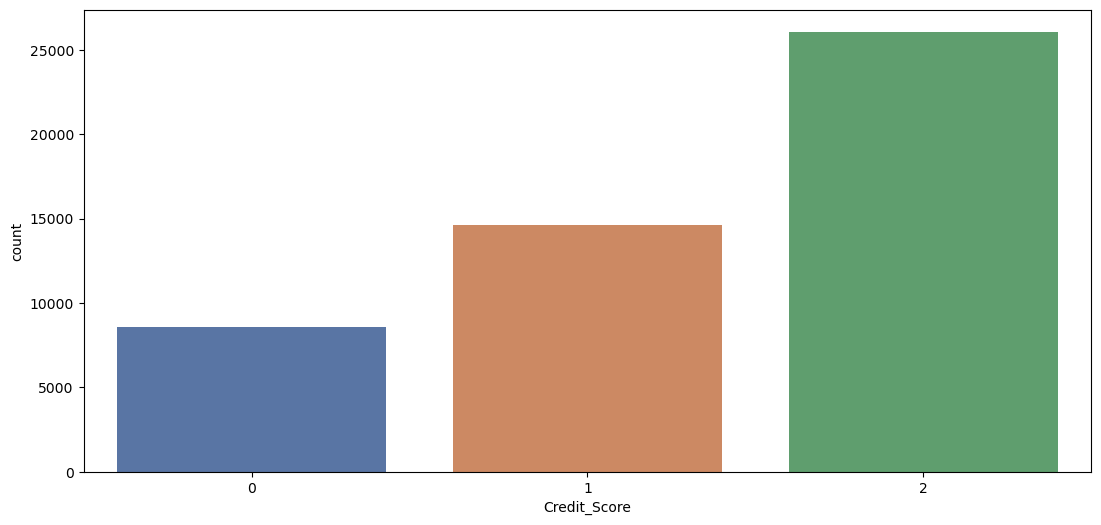

In [175]:
sns.countplot('Credit_Score', data=rf_sample_submission)

<a id="16"></a> <br> 
### Decision tree

In [176]:
dt_test_preds1 = dt_classifier.predict(df_test_concatenated)

In [177]:
dt_sample_submission = pd.DataFrame({"Customer_ID":credit_score_data_test["Customer_ID"], "Credit_Score":dt_test_preds1})
dt_sample_submission.shape

(49262, 2)

C:\Users\nadya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

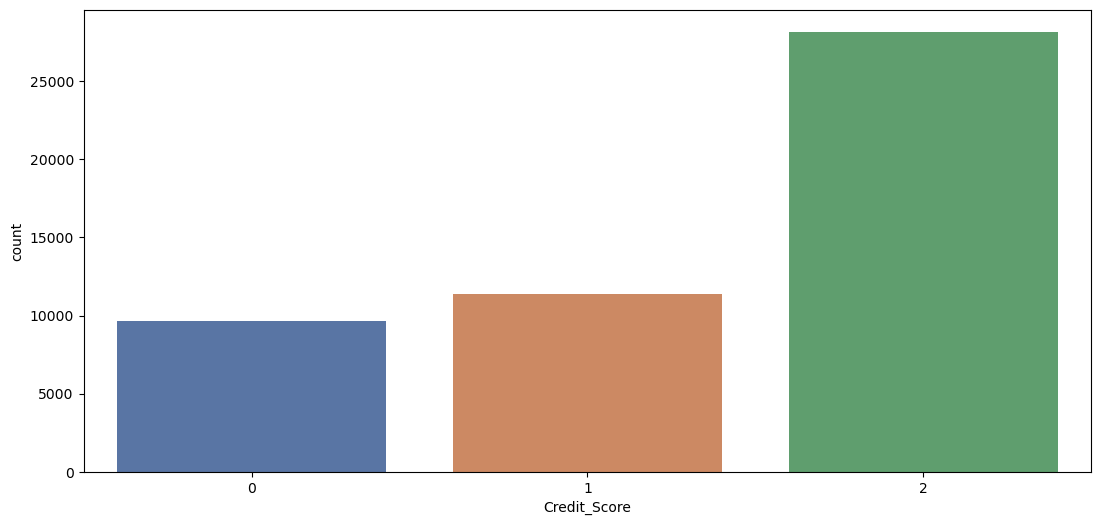

In [178]:
sns.countplot('Credit_Score', data=dt_sample_submission)

<a id="17"></a> <br> 
### XG Boost

In [179]:
xgb_test_preds1 = xgb_classifier.predict(df_test_concatenated)

In [180]:
xgb_sample_submission = pd.DataFrame({"Customer_ID":credit_score_data_test["Customer_ID"], "Credit_Score":xgb_test_preds1})
xgb_sample_submission.shape

(49262, 2)

C:\Users\nadya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

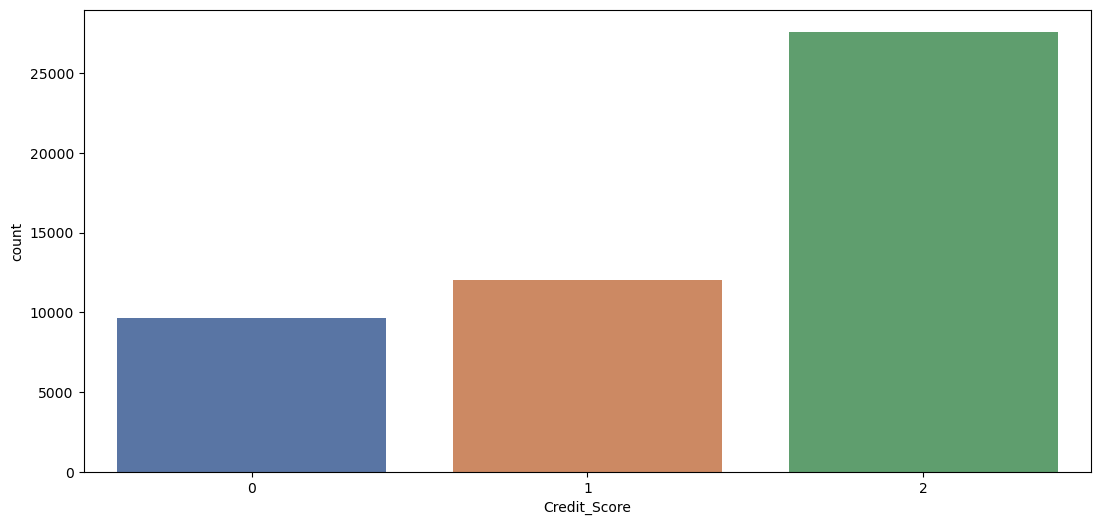

In [181]:
sns.countplot('Credit_Score', data=xgb_sample_submission)

<a id="18"></a> <br> 
## Conclusion

In this project, we aimed to develop a robust and accurate system for classifying credit scores.

**Data Preparation**: The project started with EDA to gain insights into the dataset. Also, the inconsistent and dirty data was cleaned in order our models to be accurate and to perform better.

**Model Training and Evaluation**: Five models were trained on the training data and their performance was evaluated. The models were evaluated based on their accuracy, precision, recall. These metrics provided a holistic view of each model's predictive abilities, considering both false positives and false negatives.

**Results and Analysis**:Three of the models performed better than the other two so I decided to apply them on the new dataset in order to classify the customers and give them most accurate credit score. Before the models were applied the second dataset was also cleaned as the initial data was dirty and inaccurate.

**Recommendations**: Based on the evaluation, I stronly recommend using either Random Forest, Decision Tree or XG Boost for classifying credit scores based on a credit data due to their performance across multiple evaluation metrics. However, it's crucial to keep in mind that no model is a one-size-fits-all solution. Regular reevaluation and monitoring of the model's performance are necessary to adapt to changing trends and customer behaviors.

<a id="19"></a> <br> 
## References

Dataset :

<a href="https://www.kaggle.com/datasets/parisrohan/credit-score-classification">Datasets</a>


Other links:

<a href="https://www.kaggle.com/code/vaibhavkumbhar/credit-score-classification-xgb/input">Credit score XGB</a>

<a href="https://www.kaggle.com/code/saloni1712/credit-score-classification/notebook">Credit score classification</a>

<a href="https://www.kaggle.com/code/suhanshubhattacharya/eda-datacleaning-on-credit-card-classification">EDA and data cleaning</a>

<a href="https://www.kaggle.com/code/girishvutukuri/exercise-credit-score-prediction/notebook#Building-the-Model">Credit score exercise</a>

<a href="https://thecleverprogrammer.com/2022/12/05/credit-score-classification-with-machine-learning/">Credit score classification with ML</a>